<a href="https://colab.research.google.com/github/SuryanshPrasad/Heart-Failure-Prediction-using-Multiple-Machine-Learning-Models/blob/main/ML_Heart_Faliure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [144]:
#DATASET LINK https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

In [145]:
#!pip install scikit-learn
#!pip install termcolor
#!pip3 install lightgbm
#!pip install keras
#!pip install tensorflow



In [146]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import StandardScaler #for standardization

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score,roc_curve
!pip install --upgrade scikit-learn
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from termcolor import colored
#!pip install xgboost
from xgboost import XGBRegressor

#!pip install lightgbm
from lightgbm import LGBMRegressor

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn import set_config
set_config(print_changed_only = False)


In [147]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [148]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


# Importing Dataset

In [149]:
ht=pd.read_csv("heart.csv")
ht.head().style.set_properties(**{'background-color': 'orange',
                           'color': 'black',
                           'border-color': 'darkblack'})

In [150]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Data Pre-processing

In [151]:
#converting columns from float to int
ht['age'] = ht['age'].astype(int)
ht['platelets'] = ht['platelets'].astype(int)

In [152]:
ht.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   75        0                       582         0                 20   
1   55        0                      7861         0                 38   
2   65        0                       146         0                 20   
3   50        1                       111         0                 20   
4   65        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1     265000               1.9           130    1   
1                    0     263358               1.1           136    1   
2                    0     162000               1.3           129    1   
3                    0     210000               1.9           137    1   
4                    0     327000               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [153]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    int64  
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.5 KB


In [154]:
#shape the dataset
ht.shape

(299, 13)

In [155]:
# Checking for null values
ht.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

No null values in data

[0.02830588 0.08581759 0.0323046  0.13705326 0.02246013 0.08230861
 0.13775165 0.10681798 0.02653491 0.03017471 0.31047069]


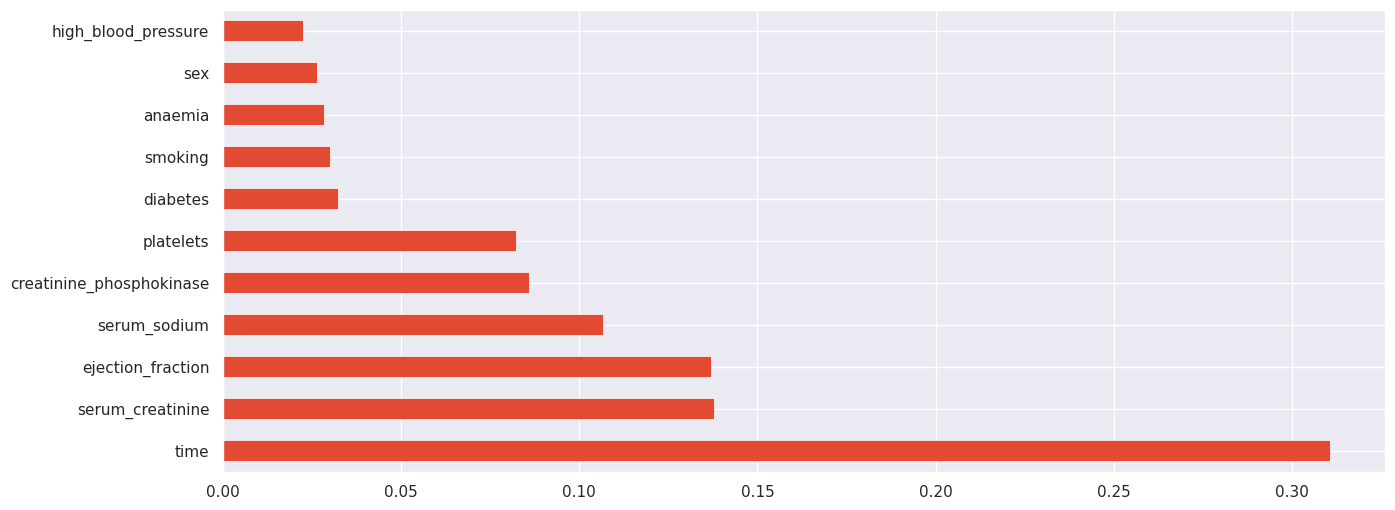

In [156]:
# Selecting the most affecting variables.

plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")

x = ht.iloc[:, 1:-1]
y = ht.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
mdl = ExtraTreesClassifier()
mdl.fit(x,y)
print(mdl.feature_importances_)
feat_importances = pd.Series(mdl.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

**Here, we will select 3 features, Time, Ejection Fraction, and Serum Creatnine. Since, they are the most affecting ones.**

The death event feature, that we use as the target in our binary classification study, states if the patient died or survived before theend of the follow-up period, that was 130 days on average

In [157]:
ht.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.829431    0.431438                581.839465    0.418060   
std     11.894997    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.026756   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [158]:
ht.dtypes

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                     int64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

As we can see the string data in the dataframe is in the form of object, we need to convert it back to string to work on it

In [159]:
string_col = ht.select_dtypes(include="object").columns
ht[string_col]= ht[string_col].astype("string")
ht.dtypes

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                     int64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


So, as we can see here the object data has been converted to string

In [160]:
string_col=ht.select_dtypes("string").columns.to_list()


In [161]:
num_col=ht.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)


In [162]:
ht.dtypes

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                     int64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

**The Attributess include:**

**Age: age of the patient [years]**

**Creatinine phosphokinase (CPK):  CPK enzyme concentration in the blood [micrograms per liter]**

**Ejection fraction: Percentage of blood leaving the heart per contraction [Percentage]**

**Platelets: Percentage of blood leaving the heart per contraction [kiloplatelets per microliter]**

**Serum creatinine: The number of platelets in the blood [kiloplatelets per microliter]**

**Serum sodium: Sodium levels in the blood [milliequivalents per litre]**

**Time: Time for follow-up [Days]**

**Death event: If the patient died during the time of follow-up [0=No, 1= Yes]**

**Anaemia: Red blood cell or hemoglobin deficiency [0=No, 1= Yes]**

**Diabetes: If the patient suffers from diabetes [0=No, 1= Yes]**

**High blood pressure: If a patient suffers from hypertension [0=No, 1= Yes]**

**Smoking: If the patient consumes tobacco products [0=No, 1= Yes]**
**Sex:Whether the patient is a woman or a man [0=Female, 1=Male]**

# Exploratory Data Analysis


Exploratory Data Analysis

First Question should be why do we need this ??
Out Come of this phase is as given below :

Understanding the given dataset and helps clean up the given dataset.

It gives you a clear picture of the features and the relationships between them.

Providing guidelines for essential variables and leaving behind/removing non-essential variables.

Handling Missing values or human error.

Identifying outliers.

EDA process would be maximizing insights of a dataset.

This process is time-consuming but very effective,
Correlation Matrix. Its necessary to remove correlated variables to improve your model.
One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using plotly express.

Lighter shades represents positive correlation

Darker shades represents negative correlation

In [163]:
import plotly.express as px

In [164]:
px.imshow(ht.corr(),title="Correlation Plot of the Heat Failure Prediction")

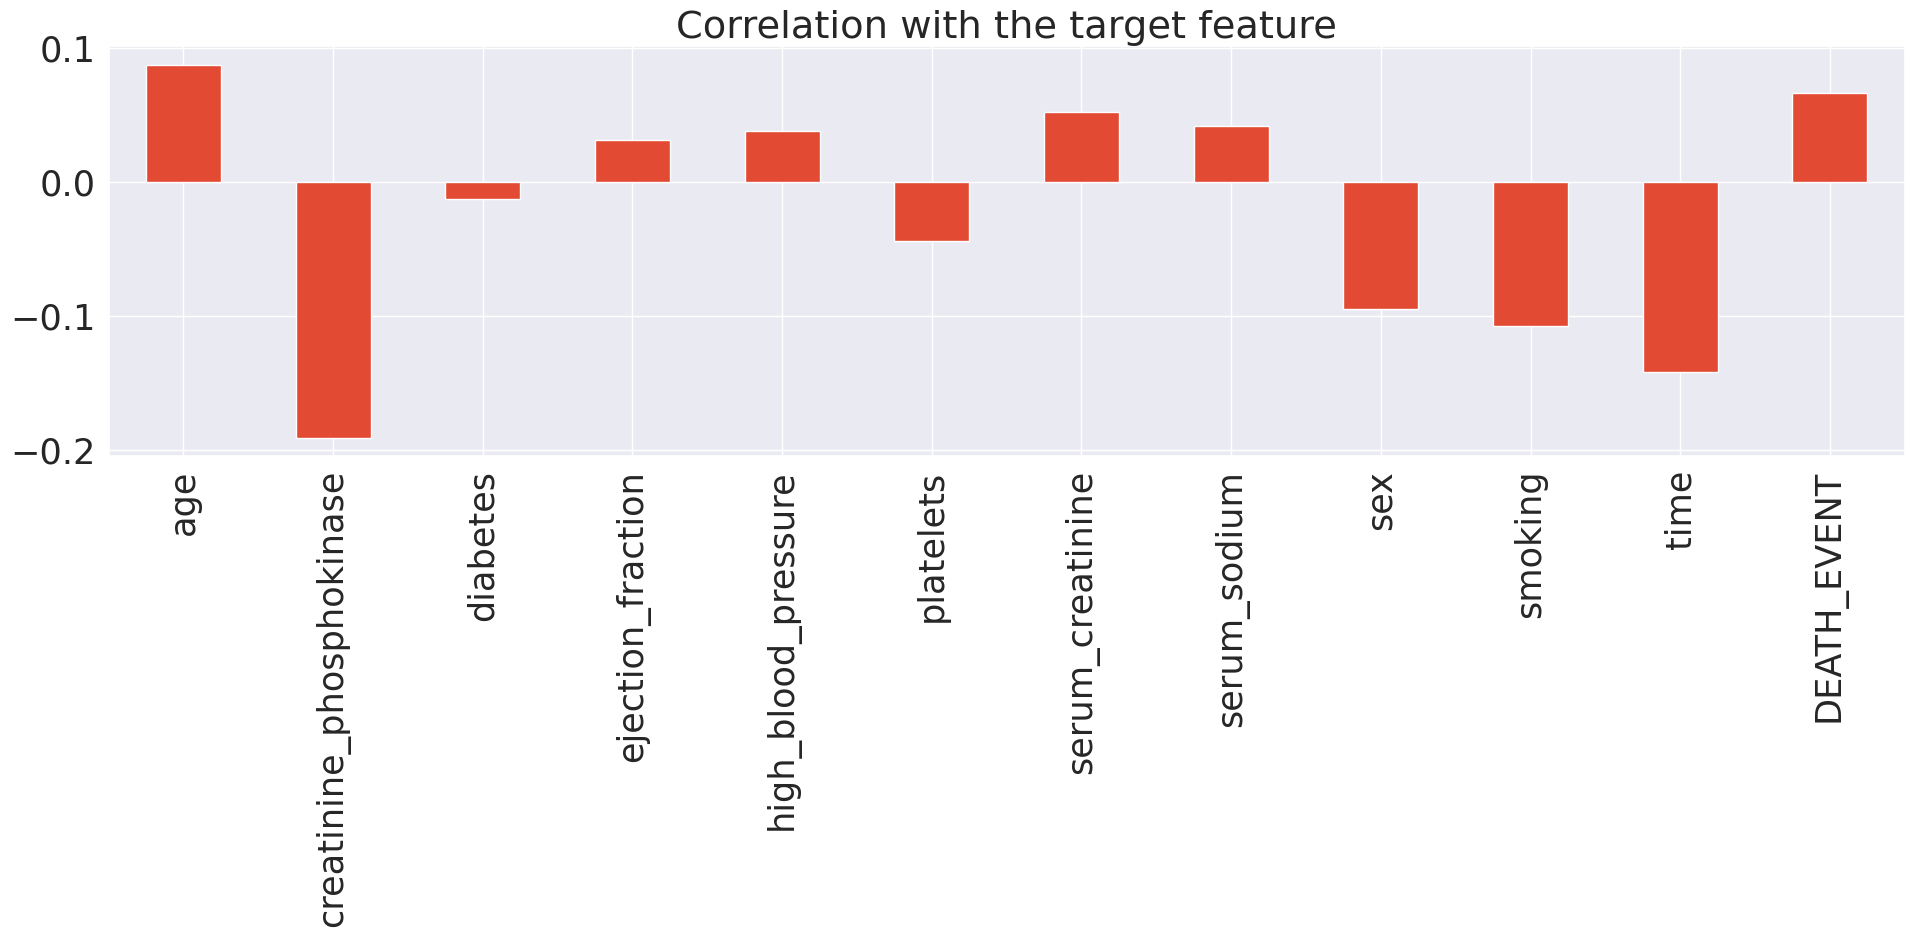

In [165]:
sns.set_context('notebook',font_scale = 2.3)
ht.drop('anaemia', axis=1).corrwith(ht.anaemia).plot(kind='bar', grid=True, figsize=(20, 10),
                                                        title="Correlation with the target feature")
plt.tight_layout()

In [166]:
ht.describe().T

count           mean           std      min  \
age                       299.0      60.829431     11.894997     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.026756  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

**Age(“age”) Analysis
Here we will be checking the 10 ages and their counts.**

In [167]:
#mean values of all features for case of death event and no death event

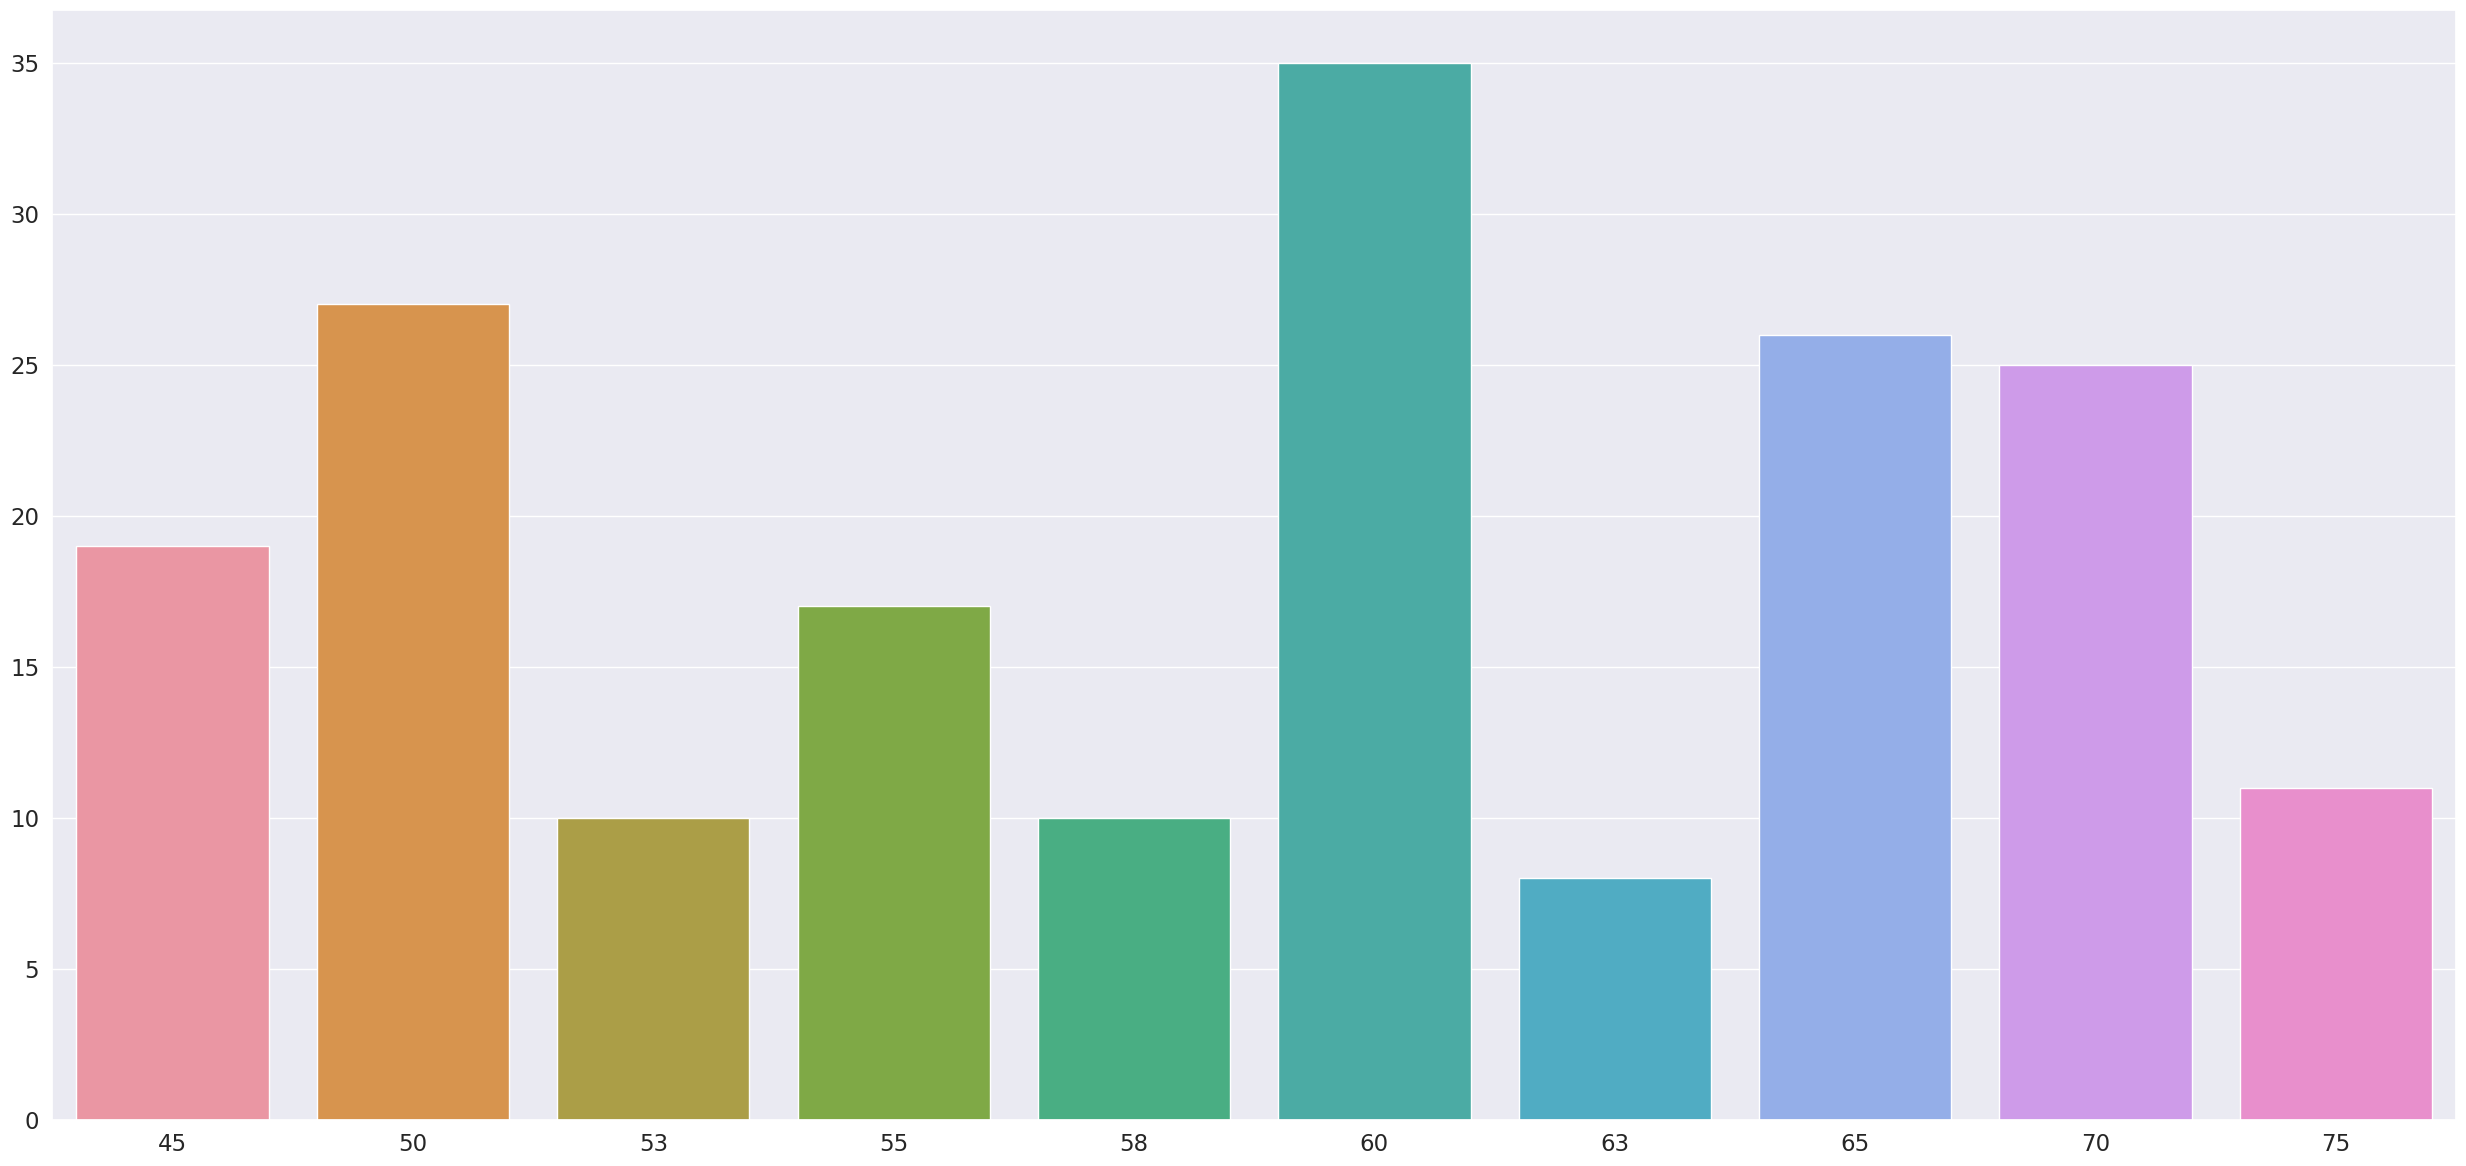

In [168]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=ht.age.value_counts()[:10].index,y=ht.age.value_counts()[:10].values)
plt.tight_layout()


**Here we can see that the 60 age column has the highest frequency.**

In [169]:
minAge=min(ht.age)
maxAge=max(ht.age)
meanAge=ht.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 40
Max Age : 95
Mean Age : 60.82943143812709


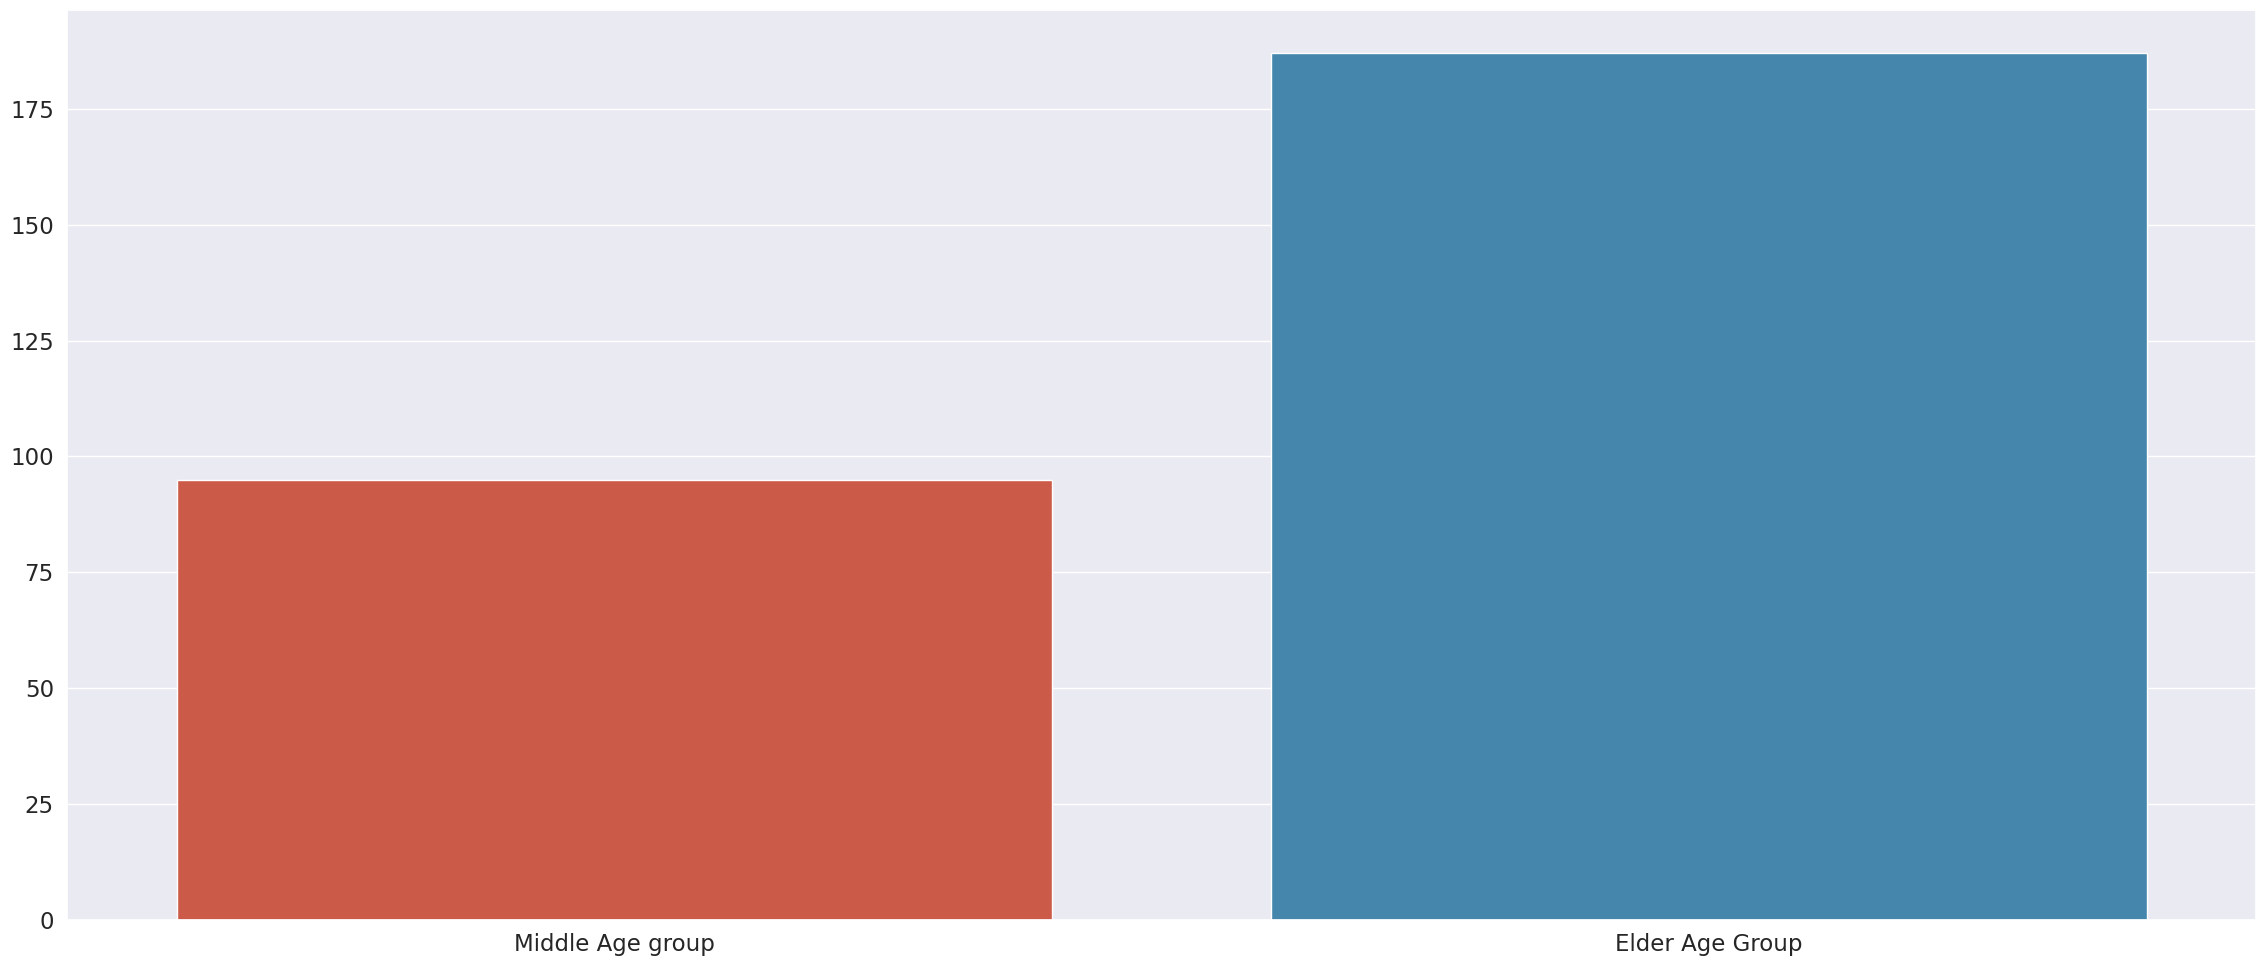

In [170]:
Middle_Age_Group = ht[(ht.age>=40)&(ht.age<55)]
Elder_Age_Group = ht[(ht.age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['Middle Age group','Elder Age Group'],y=[len(Middle_Age_Group),len(Elder_Age_Group)])
plt.tight_layout()

**Here we can see that elder people are the most affected by heart disease and middle aged ones are the least affected.**
**To prove the above inference we will plot the pie chart.**

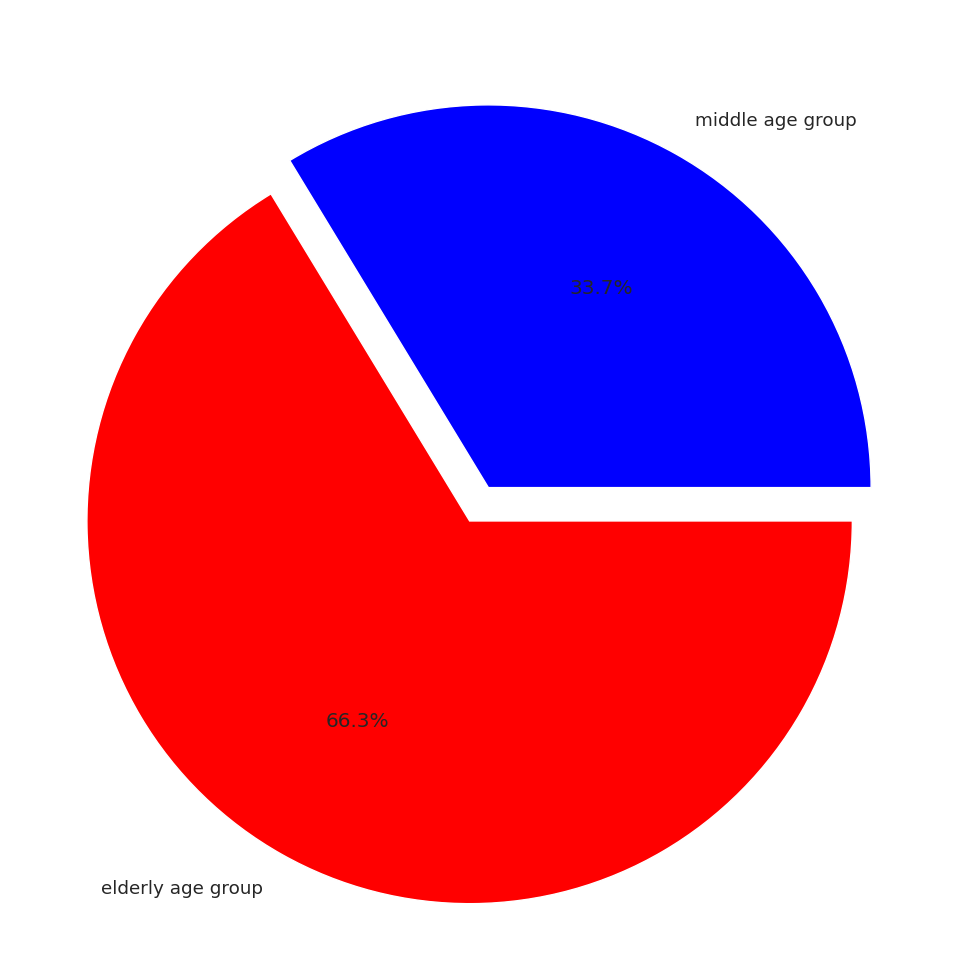

In [171]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Middle_Age_Group),len(Elder_Age_Group)],labels=['middle age group','elderly age group'],explode=[0,0.1],colors=['blue','red'], autopct='%1.1f%%')
plt.tight_layout()




**Sex(“sex”) Feature Analysis**

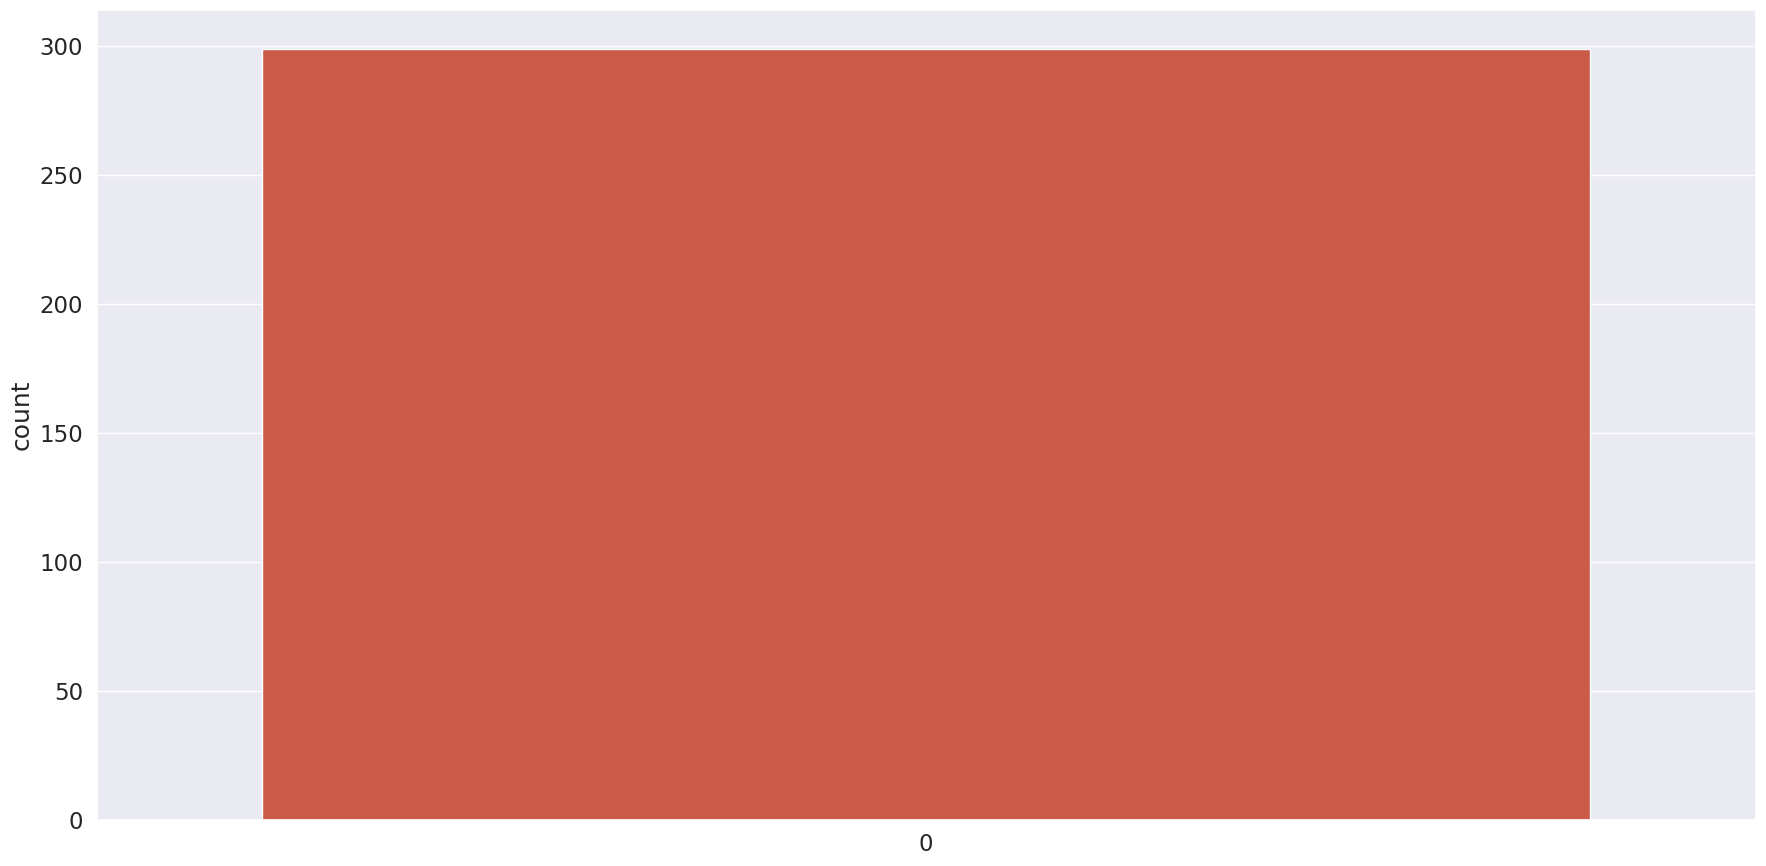

In [172]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(ht['sex'])
plt.tight_layout()



**Here it is clearly visible that, Ratio of Male to Female is approx 2:1.**

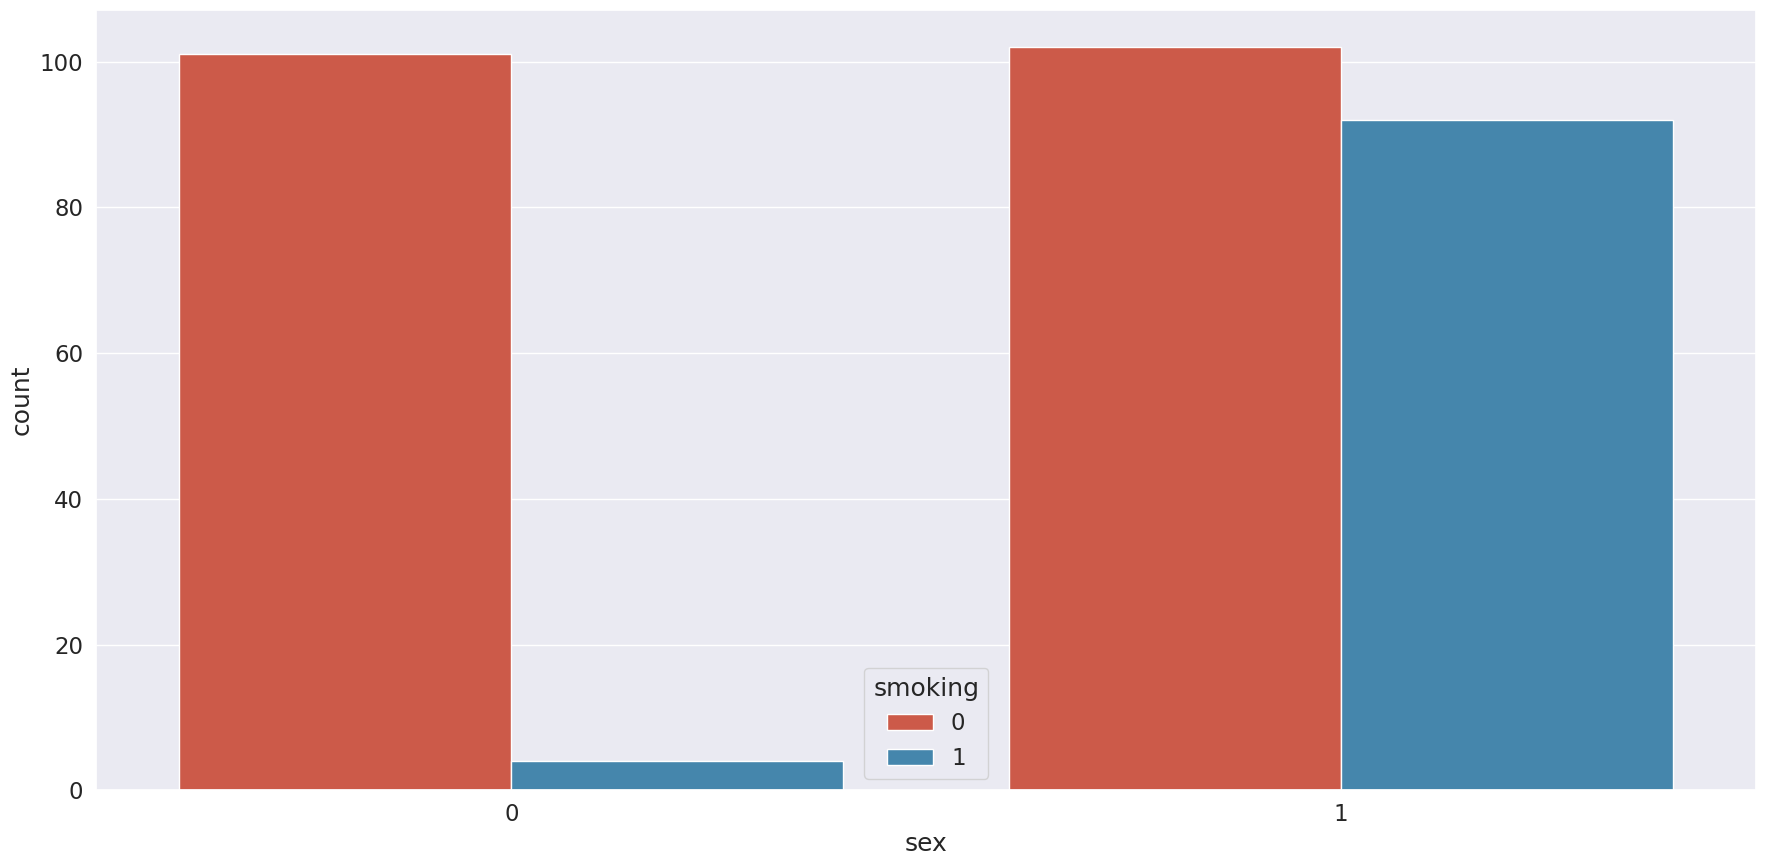

In [173]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x='sex', hue='smoking', data=ht)
plt.tight_layout()

**We can definitely say that most of the males have a habit of smoking, where as females don't.**

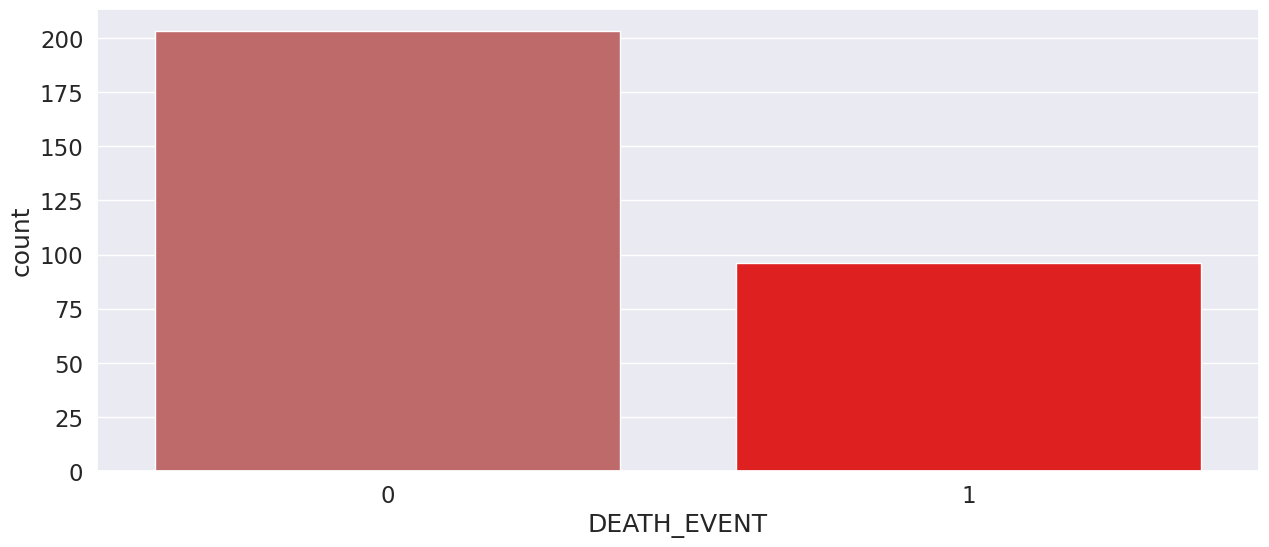

In [174]:
cols= ["#CD5C5C","#FF0000"]
sns.set_context('notebook',font_scale = 1.5)
ax = sns.countplot(x= ht["DEATH_EVENT"], palette= cols)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

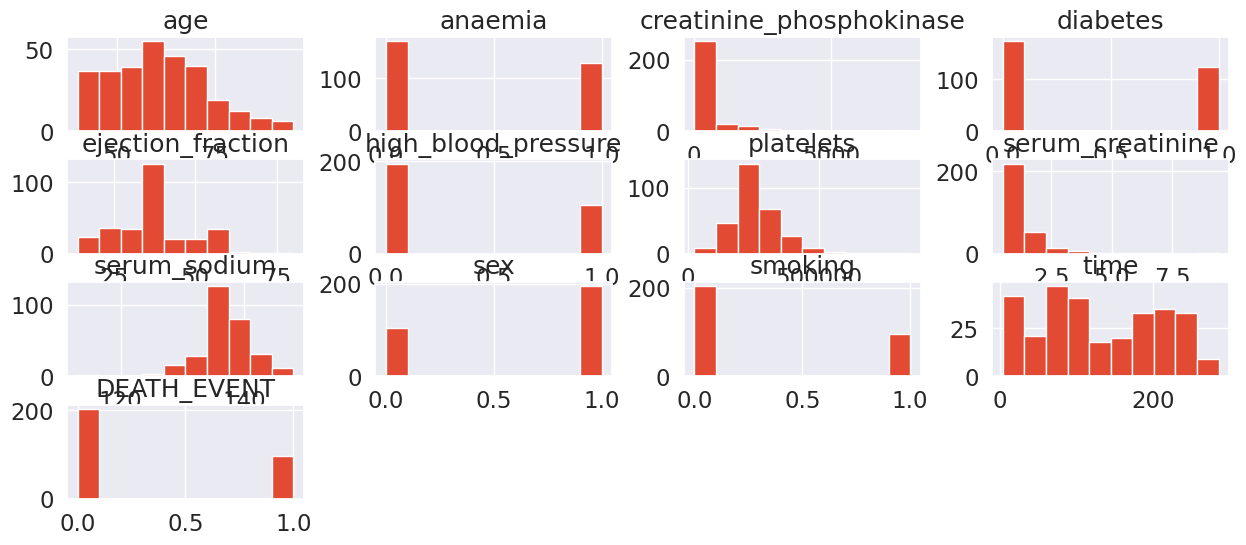

In [175]:
ht.hist()

Features "creatinine_phosphokinase" & "serum creatinine" are significantly skewed.

All the other features almost shows the normal distribution, since mean is equal to their respective medians.

<Axes: >

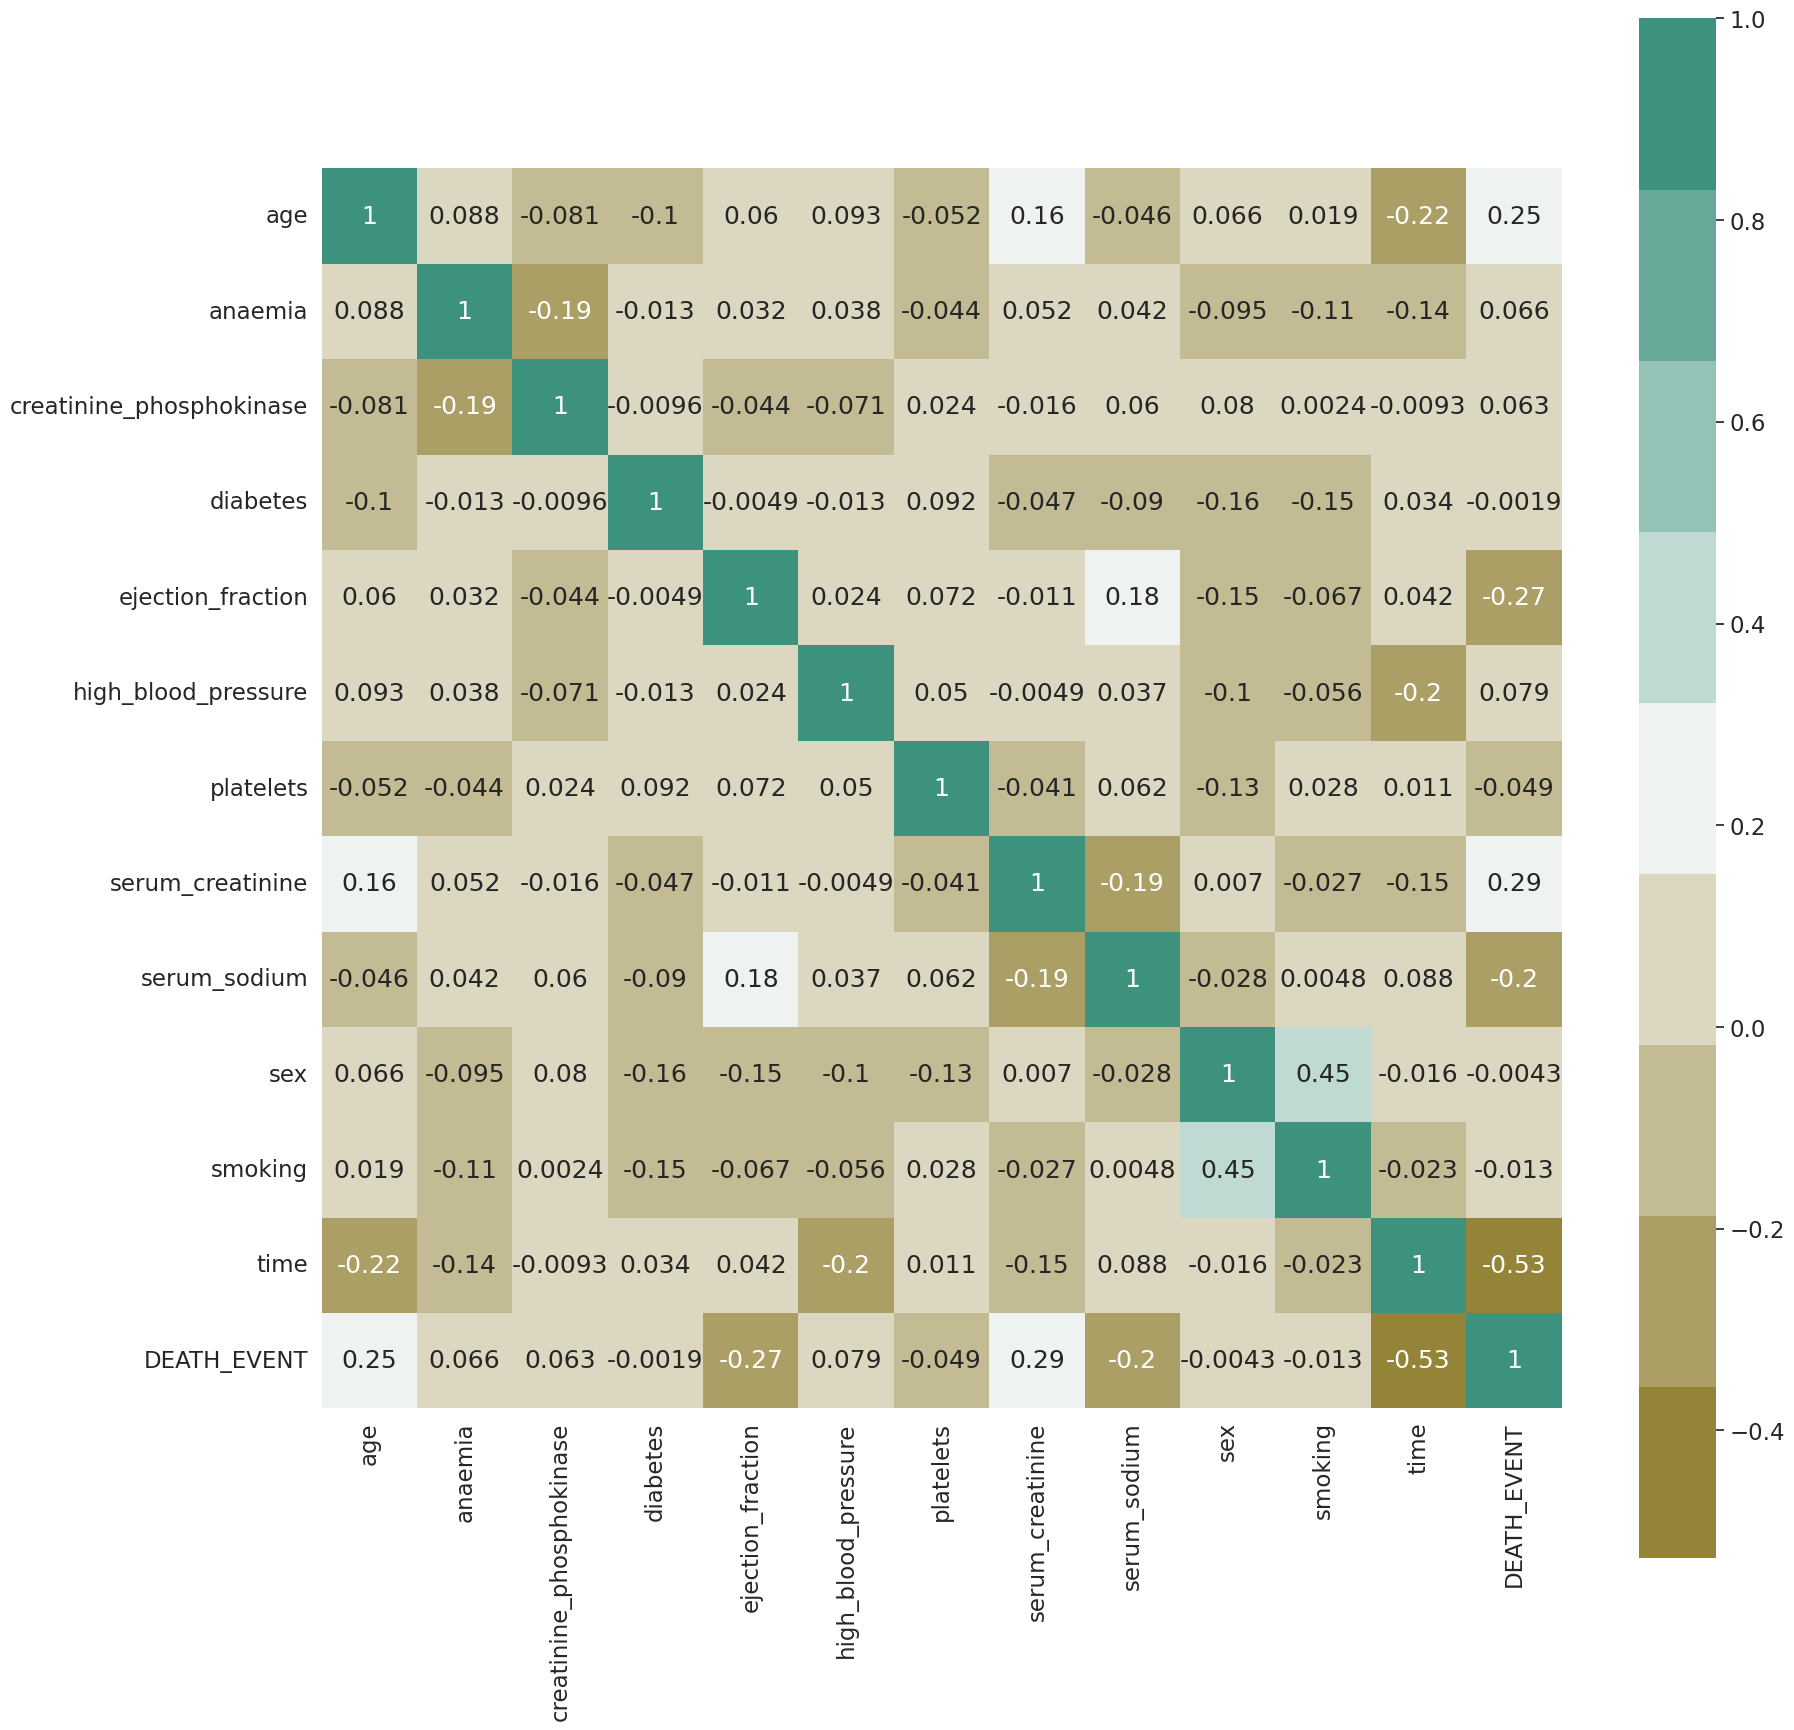

In [176]:
from traitlets import default
#Doing Bivariate Analysis by examaning a corelation matrix of all the features using heatmap
cmap = sns.diverging_palette(74, 165, s=80, l=55, n=9)
corrmat = ht.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

"time" is the most important feature as it would've been very crucial to get diagnosed early with cardivascular issue so as to get timely treatment thus, reducing the chances of any fatality. (Evident from the inverse relationship)

"serum_creatinine" is the next important feature as serum's (essential component of blood) abundancy in blood makes it easier for heart to function.

"ejection_fraction" has also significant influence on target variable which is expected since it is basically the efficiency of the heart.

Can be seen from the inverse relation pattern that heart's functioning declines with ageing.

Text(0.5, 1.0, 'Distribution Of Age')

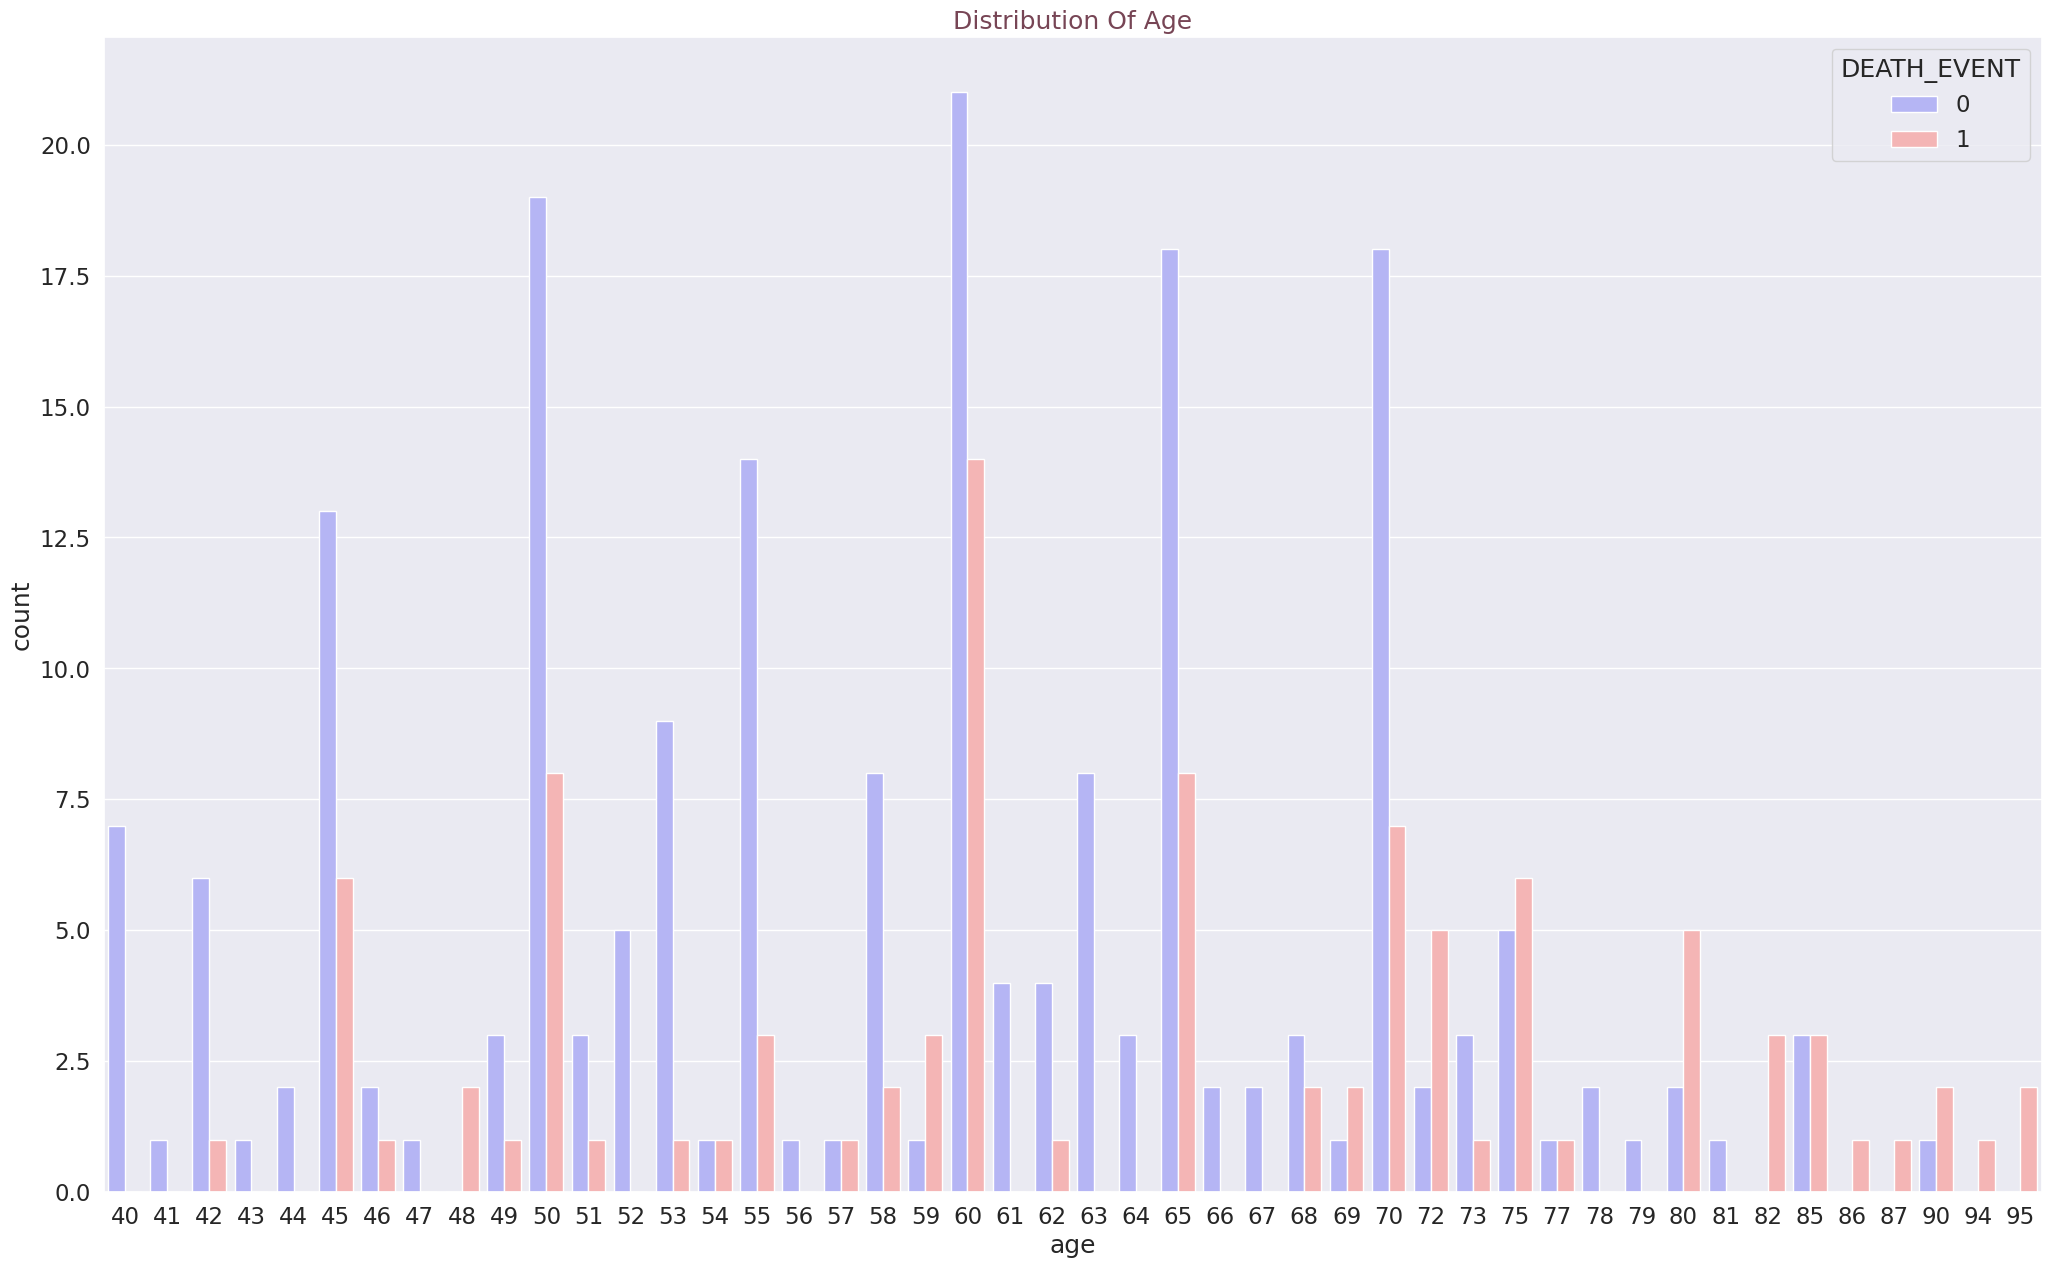

In [177]:
#Evauating age distribution as per the deaths happened
plt.figure(figsize=(25,15))
Days_of_week=sns.countplot(x=ht['age'],data=ht, hue ="DEATH_EVENT",palette = "bwr")
Days_of_week.set_title("Distribution Of Age", color="#774555")

In [178]:

import plotly.express as px
fig = px.histogram(ht, x="age", color="DEATH_EVENT", marginal="box", hover_data=ht.columns,
                   title ="Distribution of AGE Vs DEATH_EVENT",
                   labels={"age": "AGE"},
                   template="ggplot2",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

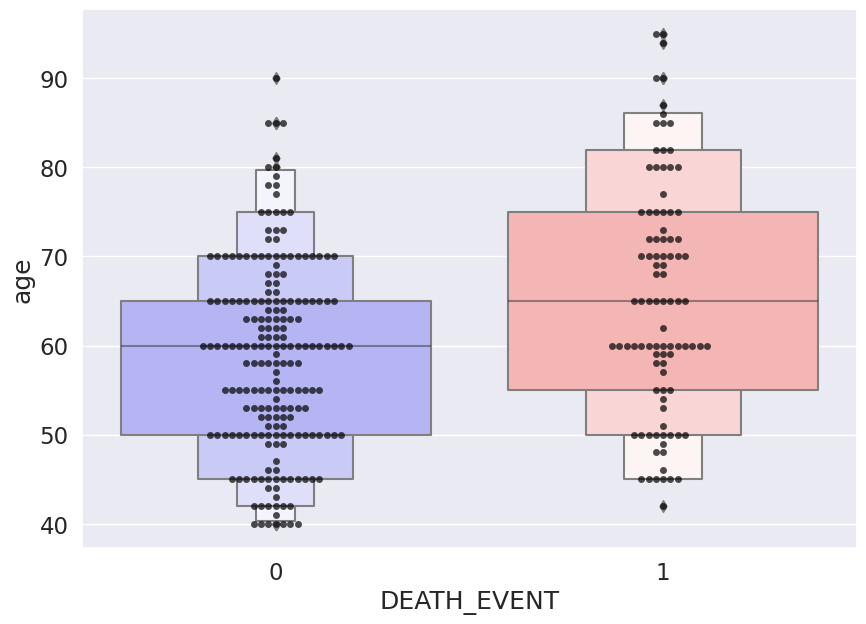

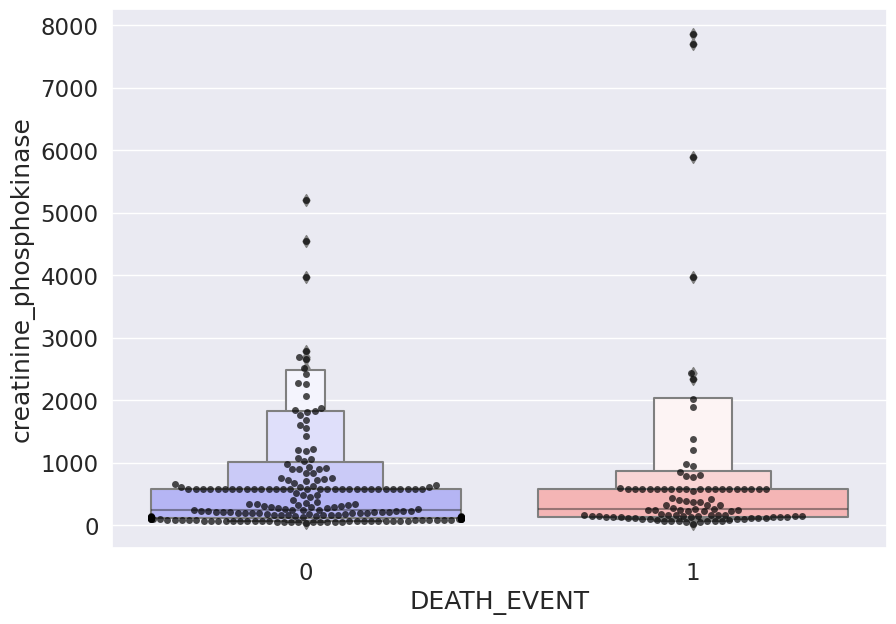

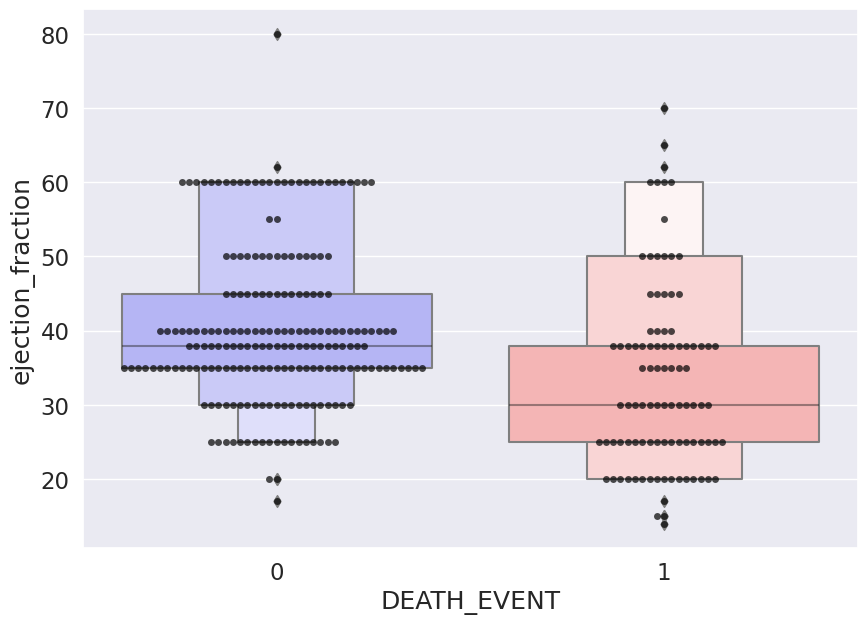

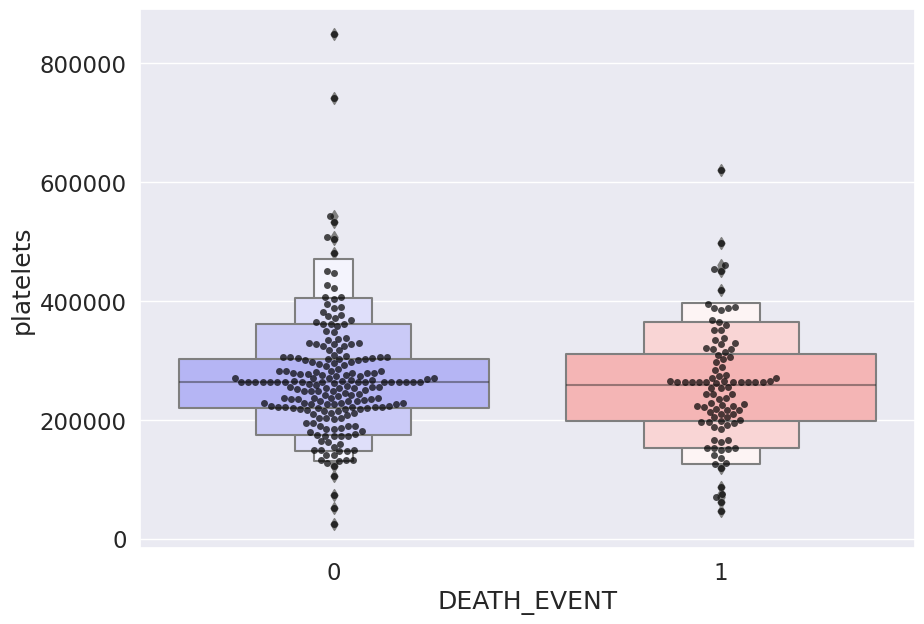

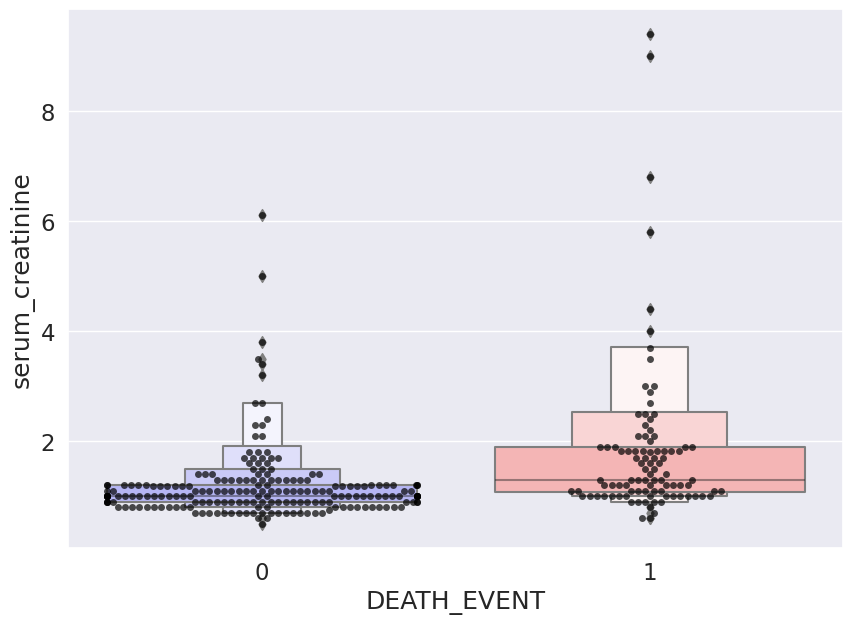

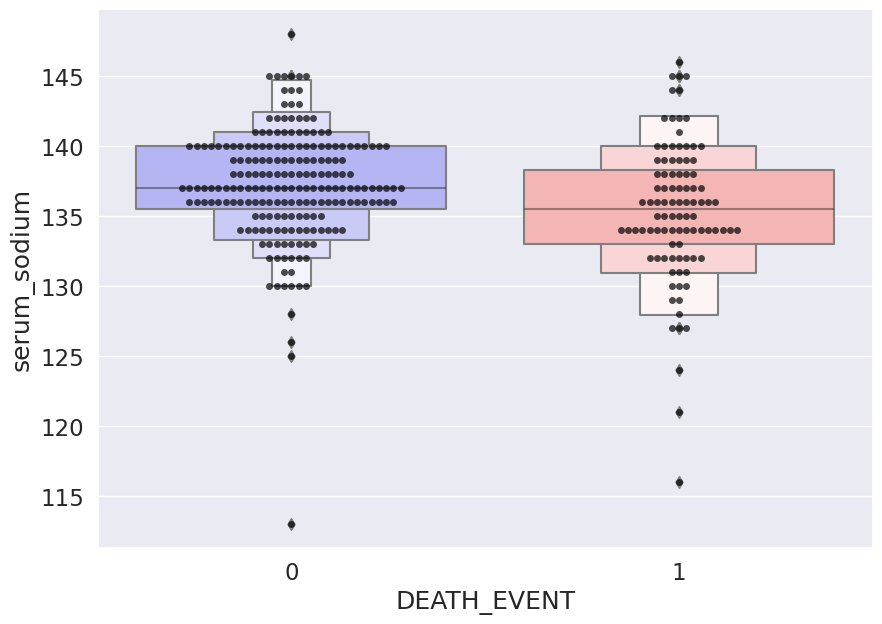

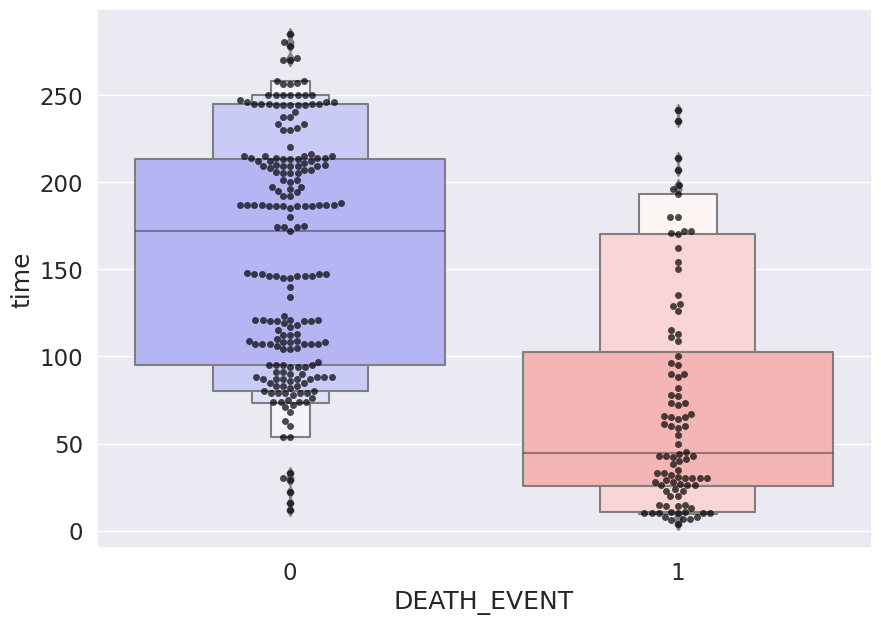

In [179]:
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=ht["DEATH_EVENT"], y=ht[i], color="black", alpha=0.7)
    sns.boxenplot(x=ht["DEATH_EVENT"], y=ht[i], palette="bwr")
    plt.show()

Few Outliers can be seen in almost all the features
Considering the size of the dataset and relevancy of it, we won't be dropping such outliers in data preprocessing which wouldn't bring any statistical fluke.

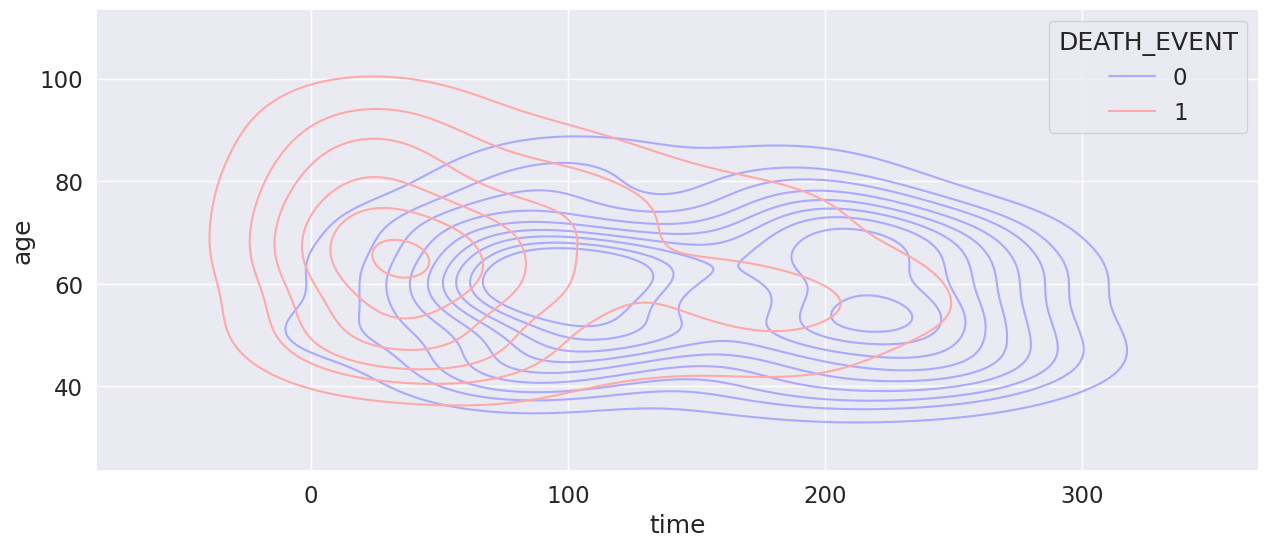

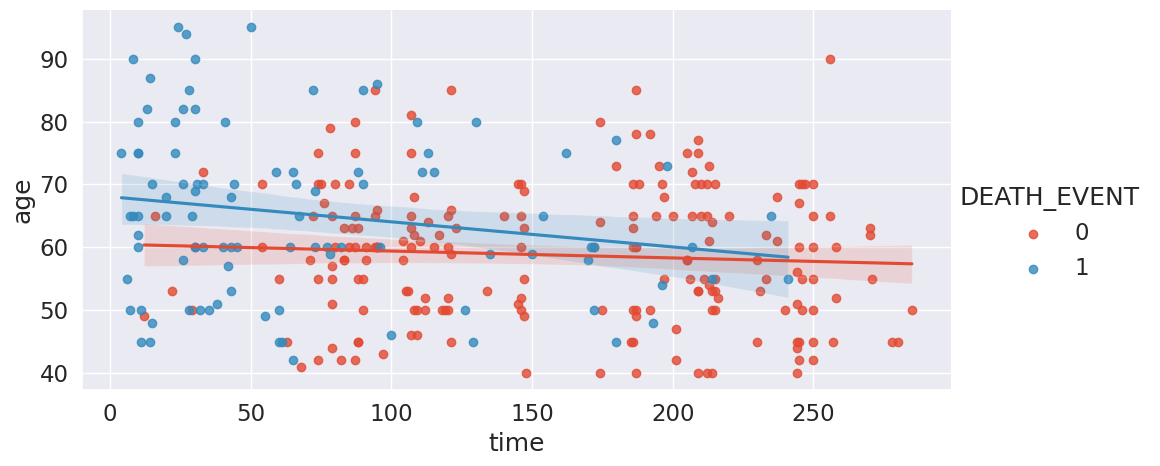

In [180]:
# Plotting "Kernel Density Estimation (kde plot)" of time and age features -  both of which are significant ones.
sns.kdeplot(x=ht["time"], y=ht["age"], hue =ht["DEATH_EVENT"], palette="bwr")
ax = sns.lmplot(x="time", y="age", hue = "DEATH_EVENT", data=ht, aspect=2.0, fit_reg = True)
plt.show()

In [181]:
df= pd.read_csv("heart.csv")
features = df.columns
print("Features Length: ", len(features))


df['DEATH_EVENT'].value_counts() # Verify Number of Death Event

Features Length:  13


0    203
1     96
Name: DEATH_EVENT, dtype: int64

from above dataset shows that Deaths events are 96 and 203 survived outof 299

In [182]:
# Select the Number of Death Events
df_death = df[df['DEATH_EVENT'] == 1]
print(df_death.shape)
df_death.head()

(96, 13)


age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [183]:
df= pd.read_csv("heart.csv")
features = df.columns
print("Features Length: ", len(features))


# CountPlot Function for Dataset Features of DEATH EVENT Only
def features_countplot(xAxis, xdf):
    plt.figure(figsize=(16,6)) # Width, Height
    ax = sns.countplot(x = xAxis, data=xdf)
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=90)

    xtitle = xAxis.replace('_', ' ').title()
    plt.title(xtitle + " In Death Events", fontsize = 24)
    plt.xlabel(xtitle + " Level", fontsize = 14)

Features Length:  13


In [184]:
# CountPlot Function of Full Dataset Features
def features_countplot_hue(xAxis, xdf):
    plt.figure(figsize=(16,6)) # Width, Height
    ax = sns.countplot(x = xAxis, data=xdf, hue='DEATH_EVENT')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.xticks(rotation=90)

    plt.legend(title='Death Event', loc='upper right', labels=['Survived', 'Died'])

    xtitle = xAxis.replace('_', ' ').title()
    plt.title("Comparison of Death & Survived Cases and " + xtitle, fontsize = 24)
    plt.xlabel(xtitle + " Level", fontsize = 14)

Vusalization for Death Events

In [185]:
#for x in features[:-1]:
 #   features_countplot(x, df_death)

Target Variable Visualization (DEATH_EVENT)

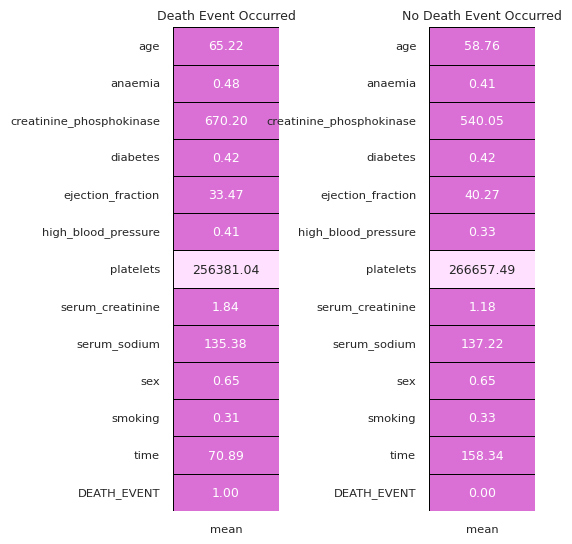

In [186]:
data=pd.read_csv("heart.csv")

sns.set(font_scale=0.75)

yes = data[data['DEATH_EVENT'] == 1].describe().T
no = data[data['DEATH_EVENT'] == 0].describe().T

colors = ['#DA70D6','#FFE1FF']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5),)
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Death Event Occurred');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Death Event Occurred');

fig.tight_layout(pad = -1)


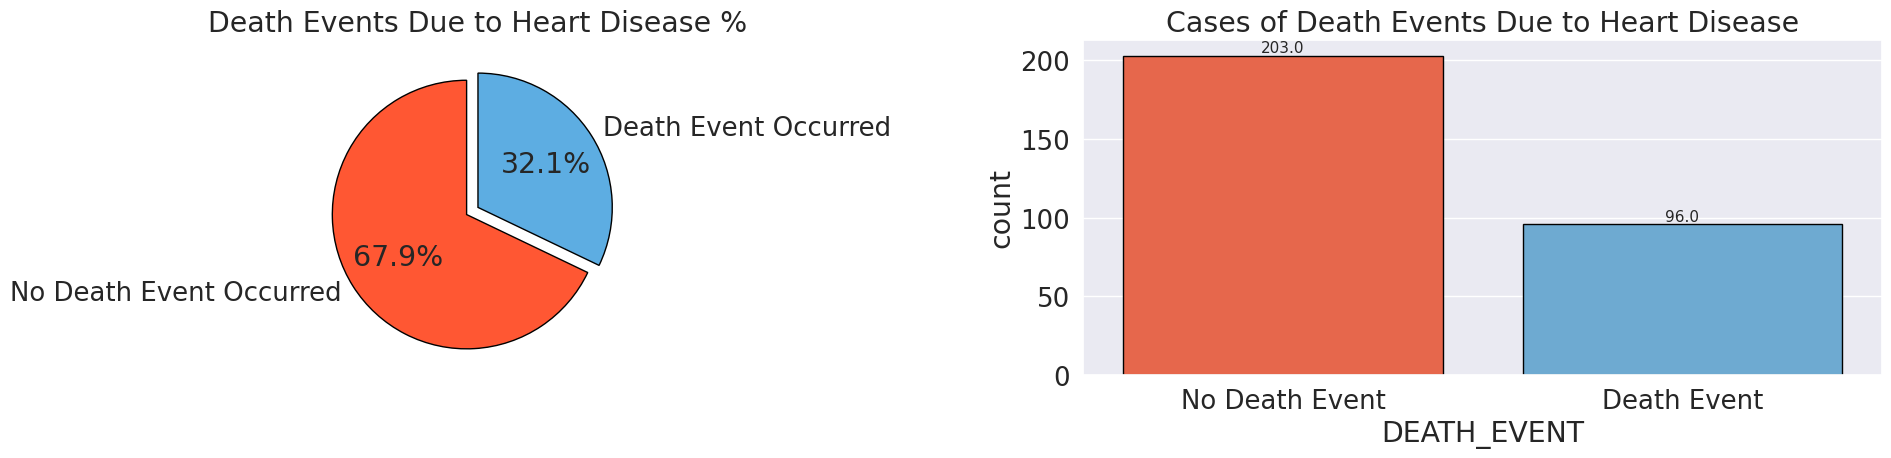

In [187]:
# Set font scale
sns.set(font_scale=1.70)

# Calculate the percentage of death event occurrences
l = list(data['DEATH_EVENT'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

# Colors
colors = ['#FF5733', '#5DADE2']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Plot the pie chart
axs[0].pie(circle, labels=['No Death Event Occurred', 'Death Event Occurred'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
           wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axs[0].set_title('Death Events Due to Heart Disease %')

# Plot the countplot
axs[1] = sns.countplot(x='DEATH_EVENT', data=data, palette=colors, edgecolor='black', ax=axs[1])
for rect in axs[1].patches:
    axs[1].text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
axs[1].set_xticklabels(['No Death Event', 'Death Event'])
axs[1].set_title('Cases of Death Events Due to Heart Disease')

plt.tight_layout()
plt.show()


 - The dataset is unbalanced with very low data points (299)!
 - 2 : 1 ratio for No Death Event cases : Death Event cases!
 - Due to this, predictions will be biased towards No Death Event cases.
 - Visualizations will also display this bias, thus making it difficult to gain insight.

In [188]:
#Dividing features into Numerical and Categorical :
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : anaemia diabetes high_blood_pressure sex smoking DEATH_EVENT
Numerical Features : age creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium time


 - Here, categorical features are defined if the attribute has less than 6 unique elements else it is a numerical feature.
 - Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.

In [189]:
#Converting the datatypes of age and platelets features from float to integer.
data['age'] = data['age'].astype(int)
data['platelets'] = data['platelets'].astype(int)
df1 = data.copy(deep = True)

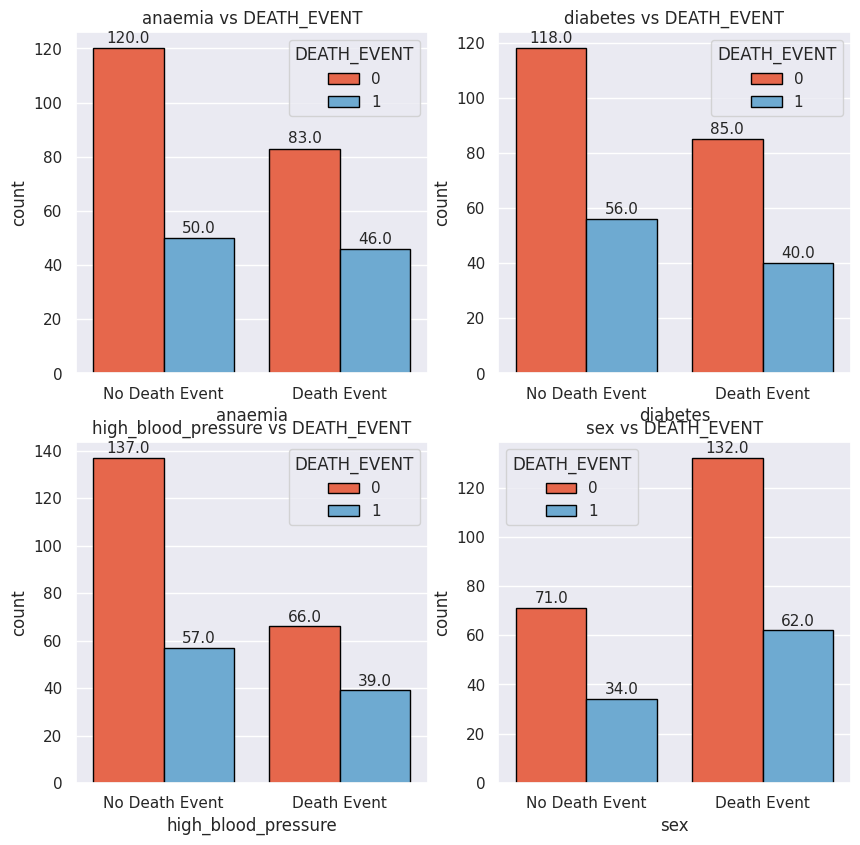

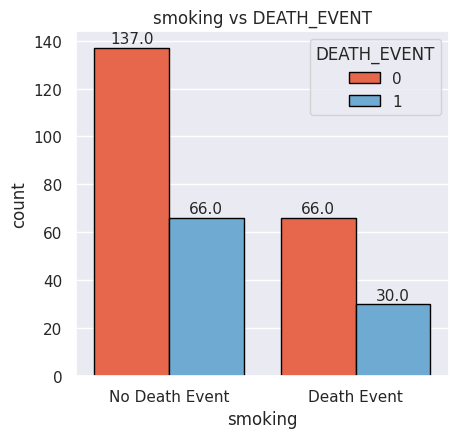

In [190]:
sns.set(font_scale=1)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 9.75))

# Plot countplots for categorical features vs DEATH_EVENT
for i in range(len(categorical_features) - 2):
    ax = axs[i // 2, i % 2]  # Adjust indexing for subplots
    sns.countplot(x=categorical_features[i], hue="DEATH_EVENT", data=data, palette=colors, edgecolor='black', ax=ax)
    ax.set_xticklabels(['No Death Event', 'Death Event'])
    title = categorical_features[i] + ' vs DEATH_EVENT'
    ax.set_title(title)
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center', fontsize=11)

# Plot countplot for the last categorical feature vs DEATH_EVENT
ax = plt.figure(figsize=(4.75, 4.55)).gca()
sns.countplot(x=categorical_features[-2], hue="DEATH_EVENT", data=data, palette=colors, edgecolor='black', ax=ax)
ax.set_xticklabels(['No Death Event', 'Death Event'])
title = categorical_features[-2] + ' vs DEATH_EVENT'
ax.set_title(title)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)

plt.tight_layout()
plt.show()


 - All the graphs near about share the same pattern.
 - According to the graphs, patients with negative cases of anaemia, diabetes, high_blood_pressure and smoking leads to DEATH_EVENT more than the positive cases of these medical conditions.
 - There are more cases cases of male population confronting a DEATH_EVENT due to heart failure than female population.

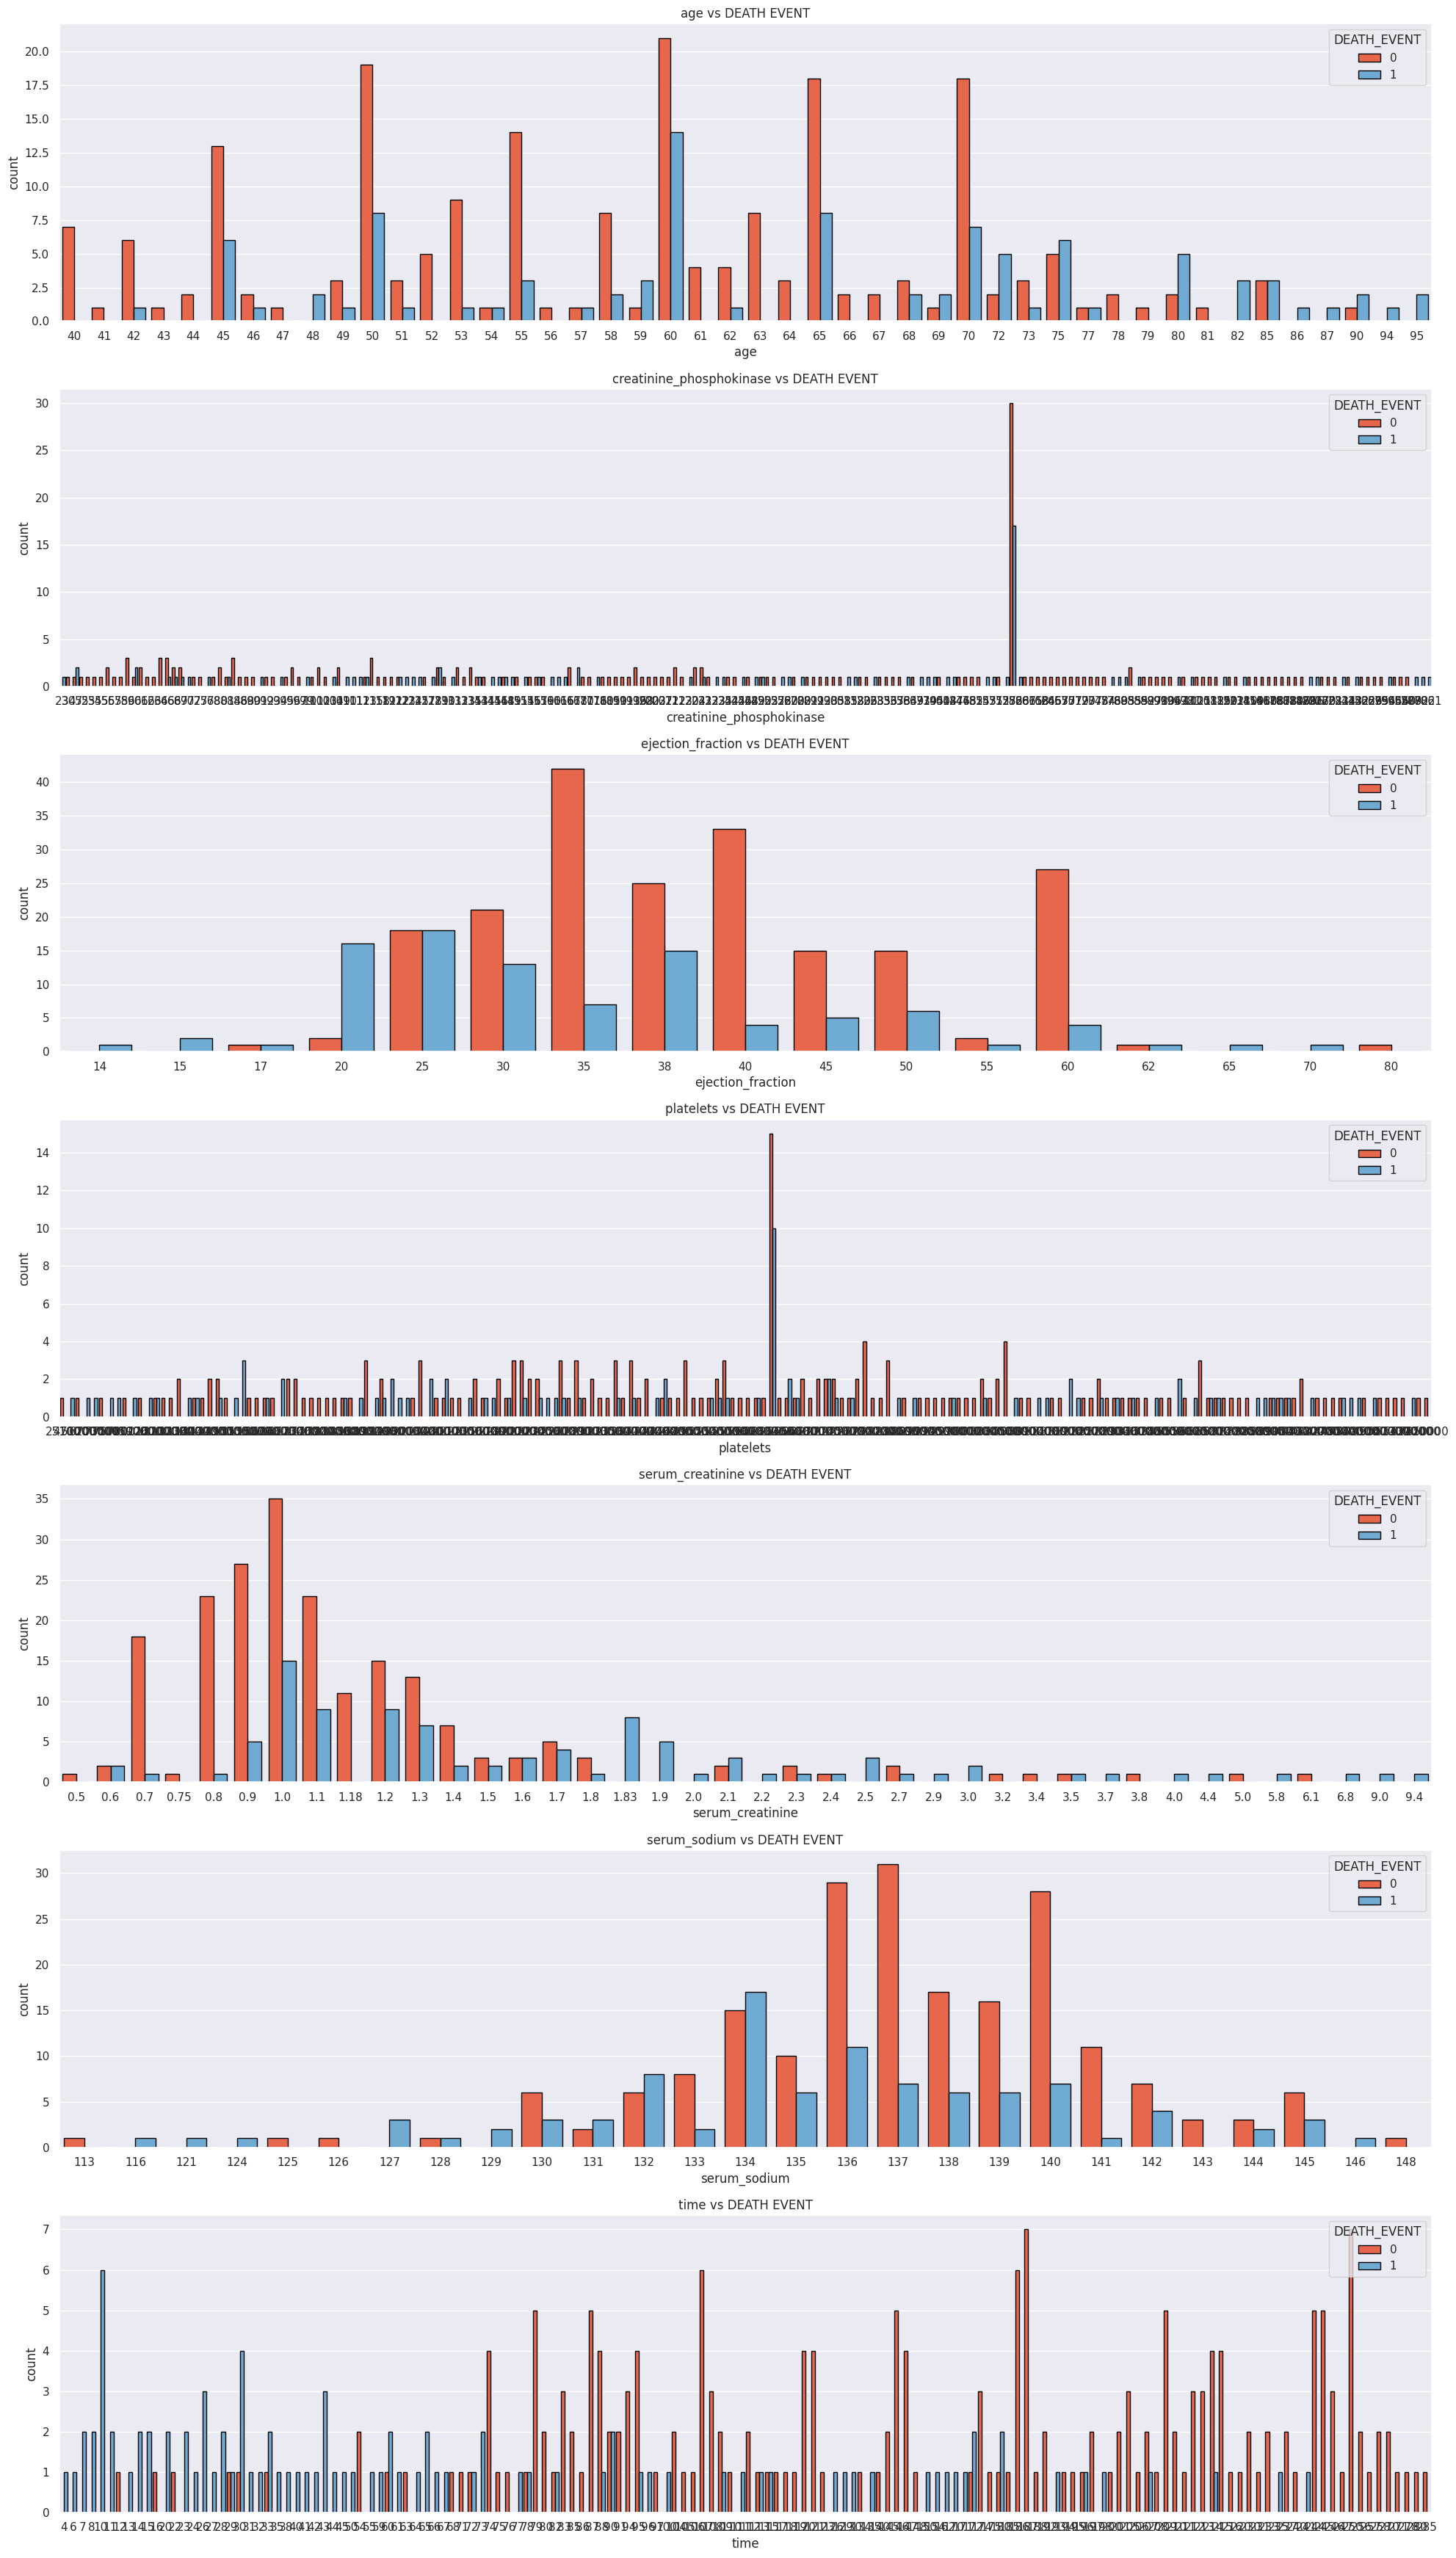

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale
sns.set(font_scale=1)

# Create subplots
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(20, 35))

# Plot countplots for numerical features vs DEATH_EVENT
for i in range(len(numerical_features)):
    sns.countplot(x=numerical_features[i], hue="DEATH_EVENT", data=data, palette=colors, edgecolor='black', ax=ax[i])
    title = numerical_features[i] + ' vs DEATH EVENT'
    ax[i].set_title(title)

plt.tight_layout()
plt.show()



 - Cases of DEATH_EVENT initiate from the age of 45. Some specific peaks of high cases of DEATH_EVENT can be observed at 45, 50, 60, 65, 70, 75 and 80.
 - High cases of DEATH_EVENT can be observed for ejaction_fraction values from 20 - 60.
 - serum_creatinine values from 0.6 to 3.0 have higher probability to lead to DEATH_EVENT.
 - serum_sodium values 127 - 145 indicate towards a DEATH_EVENT due to heart failure.
 - Because of too many unique data points in the creatinine_phosphokinase, platelets and time features, it is difficult to gain any type of insight. Thus, we will convert these features into categorical features for visualizations.
 - We scale the data points of these features to a constant value that represents a range of values.(like mean)
 - Here, we divide the data points constant value and assign its quotient value as the representative constant for that data point. The scaling constants are decided by looking into the data & intuition.

In [192]:
data['creatinine_phosphokinase_Group'] = [ int(i / 100) for i in data['creatinine_phosphokinase']]
data['platelets_Group'] = [ int(i / 10**5) for i in data['platelets']]
data['time_Group'] = [ int(i / 5) for i in data['time']]

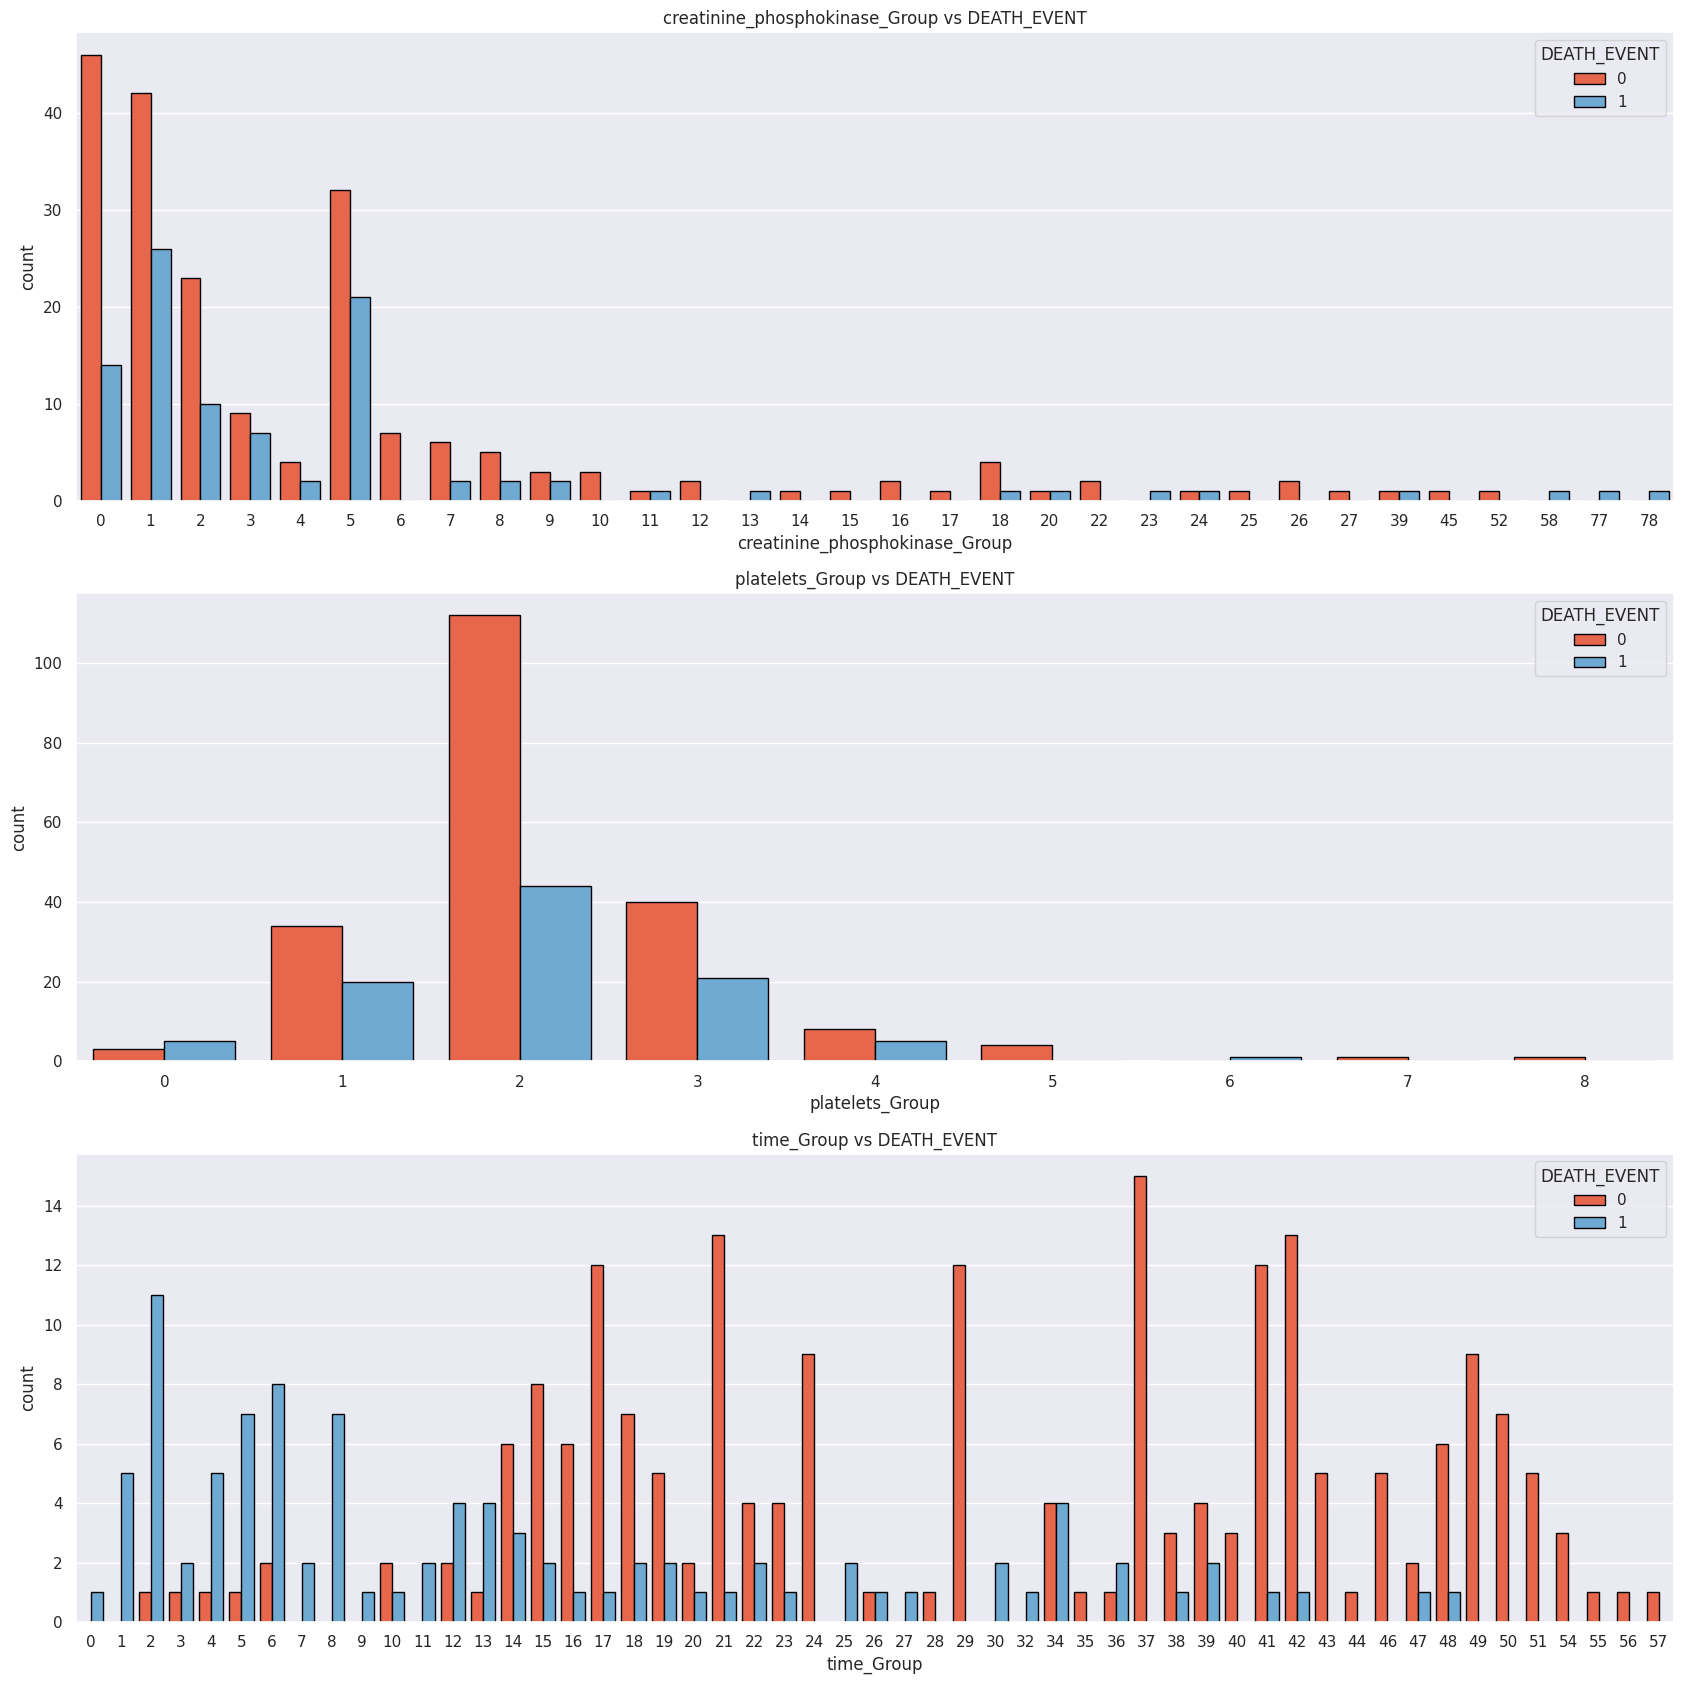

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale
sns.set(font_scale=1)

# Create subplots
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(17, 17))

# Plot countplots for grouped numerical features vs DEATH_EVENT
for i in range(len(group_numerical_features)):
    sns.countplot(x=group_numerical_features[i], hue="DEATH_EVENT", data=data, palette=colors, edgecolor='black', ax=ax[i])
    title = group_numerical_features[i] + ' vs DEATH_EVENT'
    ax[i].set_title(title)

plt.tight_layout()
plt.show()


 - DEATH_EVENT cases are on a high for the values between 0(0x100) - 500(5x100) for creatinine_phosphokinase.
 - platelets values between 0(0x10^5) - 400,000(4x10^5) are prone to heart failures leading to DEATH_EVENT.
 - For the time feature, values from 0(0x5) - 170(34x5) have higher probability to lead to a DEATH_EVENT.

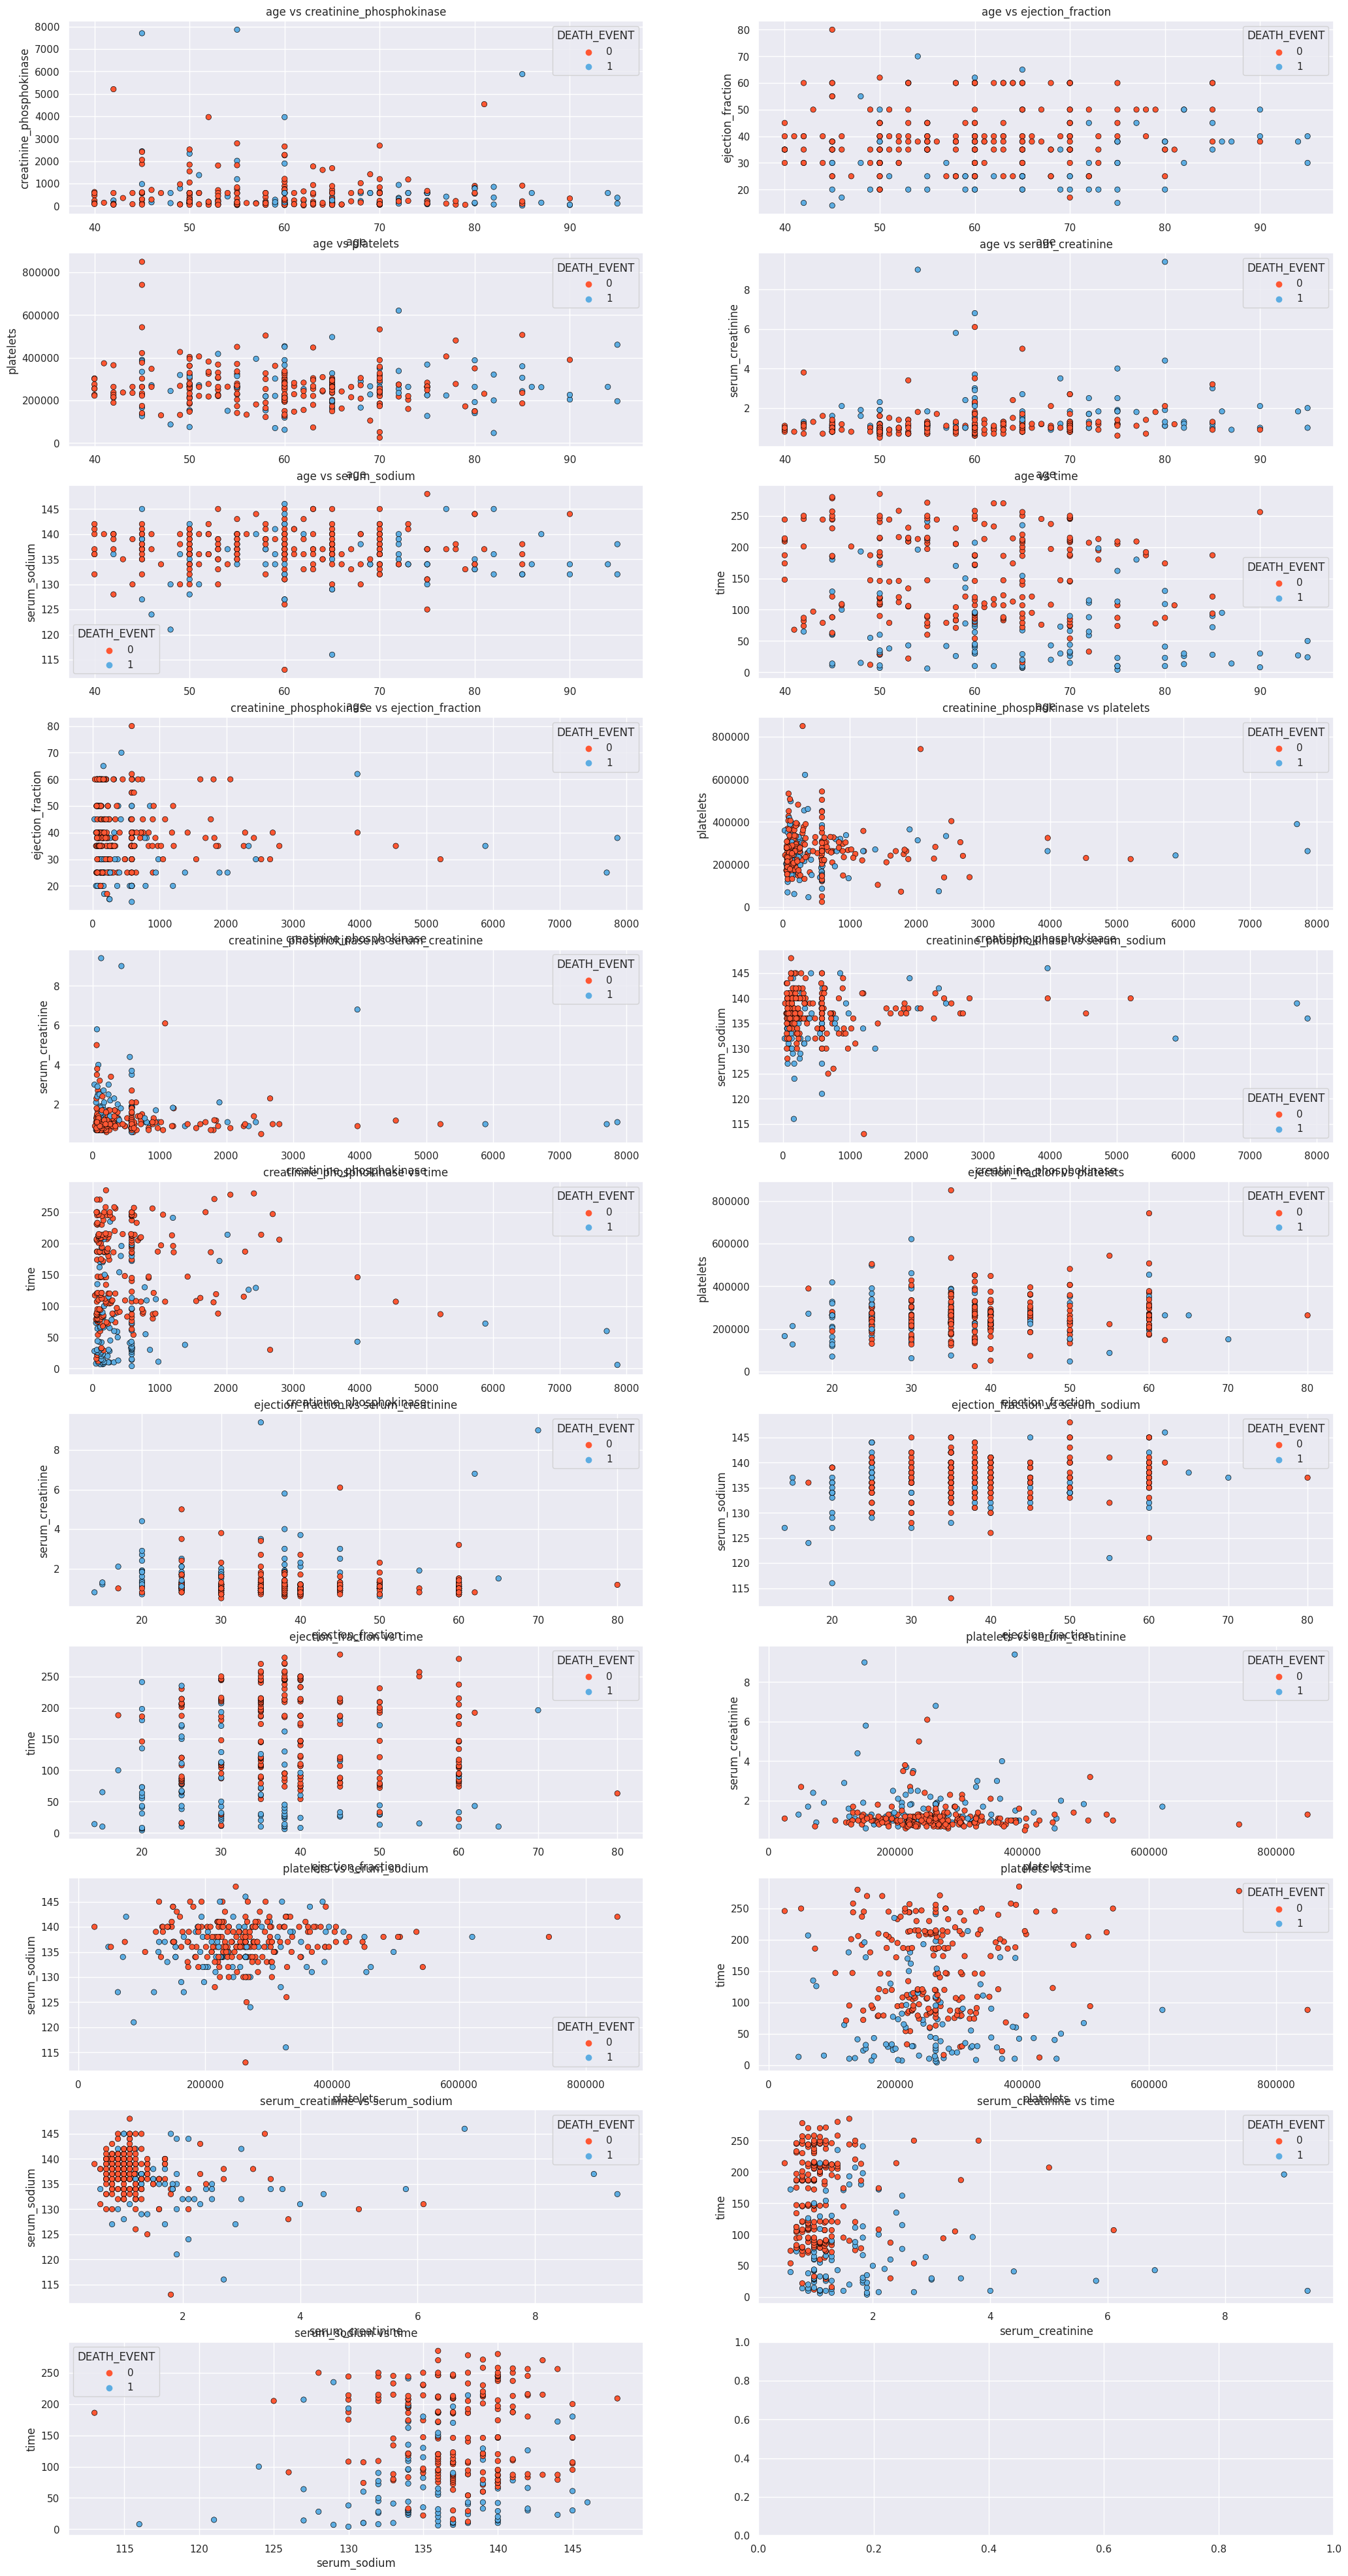

In [194]:
# Numerical features vs Numerical features w.r.t Target variable(DEATH_EVENT) :
a = 0
fig,ax = plt.subplots(nrows = 11,ncols = 2,figsize = (25,50),squeeze = False)
for i in range(len(numerical_features) - 1):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(11,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,hue = 'DEATH_EVENT',palette = colors,edgecolor = 'black');
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)


 - For time vs age plot, DEATH_EVENT peaks can be found at age values of 50, 60, 70 and 80 for time value range between 50 - 100.
 - creatinine_phosphokinase values between 0 - 500 are dominant in recording DEATH_EVENT irrespective of other features.
 - Similarly, ejaction_fraction values between 20 - 40 record high number of cases of DEATH_EVENT.
 - platelets range of values between 2x10^5 - 4x10^5 and time between 0 - 50 is a strong indicator for DEATH_EVENT.
 - Another indicator for DEATH_EVENT is serum_creatinine values from 0 - 2 with time values from 0 - 50.
 - serum_sodium range of values from 130 - 140 record high number of cases for DEATH_EVENT.

# Data Scaling & Feature Selection


In [195]:
# Defining independent and dependent attributes in training and test sets
#X=ht.drop(["DEATH_EVENT"],axis=1)
#y=ht["DEATH_EVENT"]
# Setting up a standard scaler for the features and analyzing it thereafter
#col_names = list(X.columns)
#s_scaler = preprocessing.StandardScaler()
#X_scaled= s_scaler.fit_transform(X)
#X_scaled = pd.DataFrame(X_scaled, columns=col_names)
#X_scaled.describe().T



In [196]:
#Plotting the scaled features using boxen plots
#colors =["#CD5C5C","#F08080","#FA8072","#E9967A","#FFA07A"]
#plt.figure(figsize=(20,10))
#sns.boxenplot(data = X_scaled,palette = colors)
#plt.xticks(rotation=60)
#plt.show()

In [197]:
#x = ht.iloc[:, [4,7,11]].values
#y = ht.iloc[:,-1].values


In [198]:
# Splitting the dataset into training set and test set
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state =0)

In [199]:
# Feature Scaling

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [200]:
#print(x_train)

In [201]:
#print(y_test)

In [202]:
#x = ht[['age','ejection_fraction','serum_creatinine','serum_sodium','time', 'high_blood_pressure']]
x = ht.drop("DEATH_EVENT", axis = 1)
y = ht['DEATH_EVENT']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,shuffle = True, random_state = 1)

In [203]:
#scaler = StandardScaler()
#scaler.fit(x_train)
#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)


In [204]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [205]:
print(x_train)
print(y_test)

[[0.09090909 1.         0.01365144 ... 1.         1.         0.42391304]
 [0.27272727 0.         0.00548609 ... 1.         0.         0.82971014]
 [0.50909091 1.         0.1273284  ... 1.         0.         0.69927536]
 ...
 [0.81818182 0.         0.74751212 ... 1.         1.         0.24637681]
 [0.67272727 1.         0.01097219 ... 1.         0.         0.74275362]
 [0.76363636 1.         0.10614953 ... 0.         0.         0.0942029 ]]
173    0
287    0
51     1
146    0
214    0
197    0
274    0
62     0
27     1
201    0
112    0
119    1
11     1
244    0
110    1
295    0
73     0
105    1
265    0
107    0
188    0
12     1
70     0
18     1
88     0
108    0
298    0
176    0
120    0
250    0
85     0
296    0
132    0
285    0
131    0
78     0
253    0
138    0
90     0
189    0
4      1
193    0
154    0
247    0
80     0
16     1
168    0
127    0
58     1
185    1
279    0
211    0
174    0
59     1
150    1
212    0
191    0
283    0
172    0
139    0
Name: DEATH_EVEN

In [206]:
x_train[0:5]

array([[0.09090909, 1.        , 0.01365144, 0.        , 0.31818182,
        0.        , 0.18050673, 0.02272727, 0.74285714, 1.        ,
        1.        , 0.42391304],
       [0.27272727, 0.        , 0.00548609, 0.        , 0.39393939,
        0.        , 0.2156625 , 0.04545455, 0.71428571, 1.        ,
        0.        , 0.82971014],
       [0.50909091, 1.        , 0.1273284 , 1.        , 0.31818182,
        0.        , 0.29809674, 0.05681818, 0.6       , 1.        ,
        0.        , 0.69927536],
       [0.36363636, 1.        , 0.07131921, 0.        , 0.24242424,
        1.        , 0.12353012, 0.03409091, 0.91428571, 0.        ,
        0.        , 0.32971014],
       [0.36363636, 0.        , 0.02704772, 1.        , 0.36363636,
        0.        , 0.36840829, 0.27272727, 0.82857143, 0.        ,
        0.        , 0.0942029 ]])

In [207]:
x_test[0:5]

array([[0.18181818, 1.        , 0.01173769, 0.        , 0.09090909,
        0.        , 0.19869075, 0.02272727, 0.74285714, 1.        ,
        0.        , 0.51449275],
       [0.09090909, 0.        , 0.07131921, 1.        , 0.62121212,
        0.        , 0.62783368, 0.04545455, 0.54285714, 0.        ,
        0.        , 0.89130435],
       [0.23636364, 1.        , 0.00867568, 0.        , 0.09090909,
        1.        , 0.47630016, 0.09090909, 0.74285714, 0.        ,
        0.        , 0.14130435],
       [0.21818182, 0.        , 0.01390661, 0.        , 0.24242424,
        0.        , 0.23384653, 0.01136364, 0.65714286, 1.        ,
        1.        , 0.39130435],
       [0.45454545, 1.        , 0.01428936, 0.        , 0.31818182,
        1.        , 0.32112983, 0.02272727, 0.6       , 1.        ,
        0.        , 0.6884058 ]])

# Applying Machine Learning Algorithm

**Logistic Regression**

In [208]:
# Applying logistic regression on the training set

from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression()
#classifier.fit(x_train, y_train)
log = LogisticRegression(solver = "liblinear")
log_model = log.fit(x_train, y_train)
log_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [209]:
# Predicting the test set

y_pred = log_model.predict(x_test)

[[44  2]
 [ 5  9]]
0.8833333333333333


<Axes: >

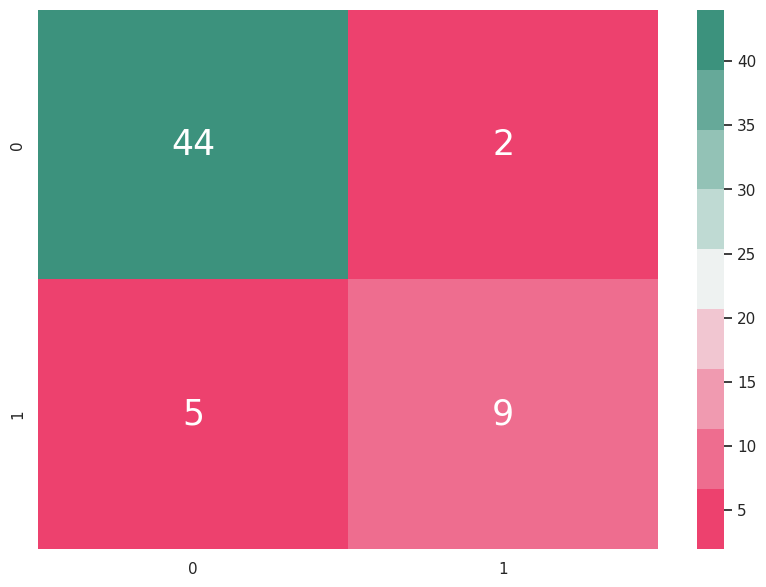

In [210]:
# Making Confusion Matrix and calculating accuracy score

mylist = []
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = confusion_matrix(y_test, y_pred)
ac1 = accuracy_score(y_test, y_pred)
mylist.append(ac1)
print(cm1)
print(ac1)
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
sns.heatmap(cm1, cmap = cmap1, annot = True, annot_kws = {'size':25})

[[44  2]
 [ 5  9]]


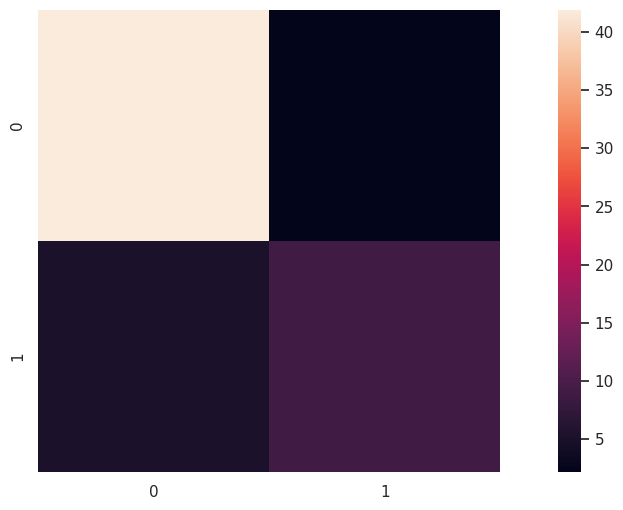

In [211]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
# Visualize it as a heatmap
import seaborn
seaborn.heatmap(conf_mat, square = True, robust = True)
plt.show()


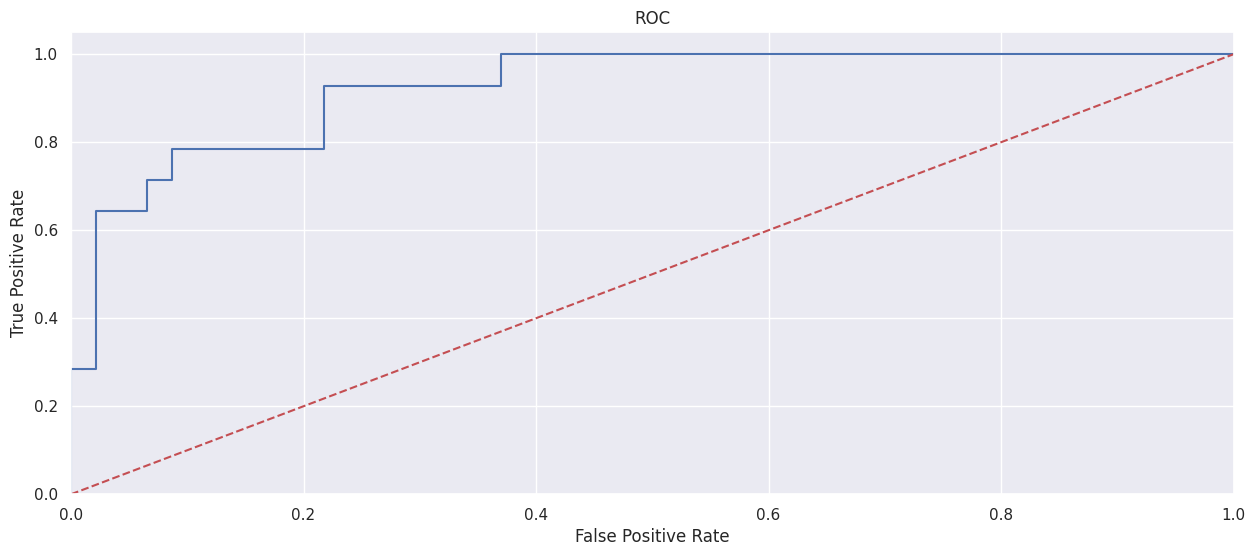

In [212]:
log_roc_auc = roc_auc_score(y_test, log_model.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

**K-Nearest**

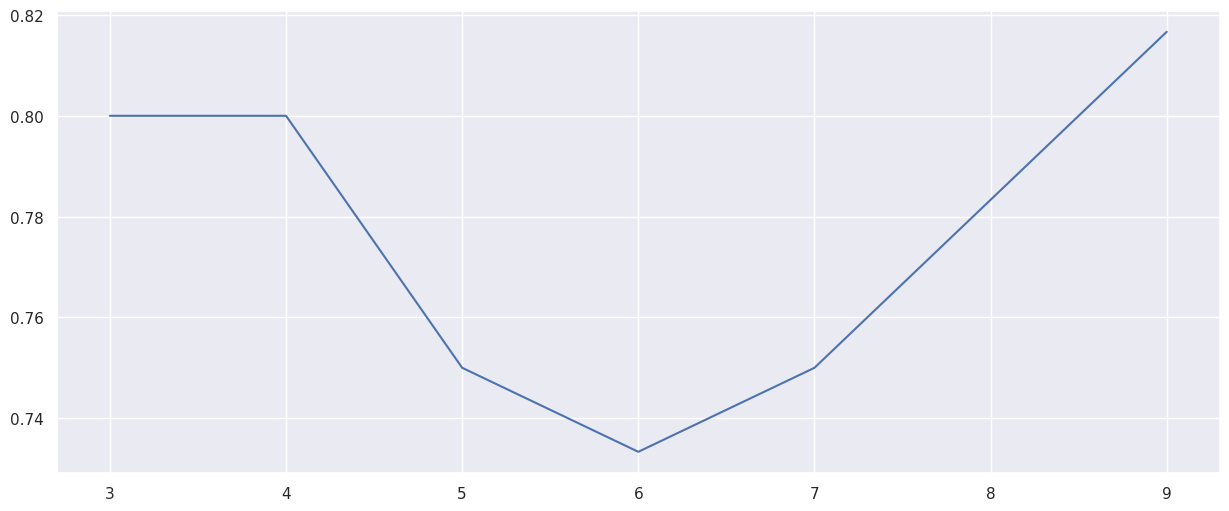

In [213]:
# Finding the optimum number of neighbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(3,10)), list1)
plt.show()

In [214]:
# Training the K Nearest Neighbor Classifier on the Training set

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [215]:
# Predicting the Test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0]


[[42  4]
 [ 8  6]]
0.8


<Axes: >

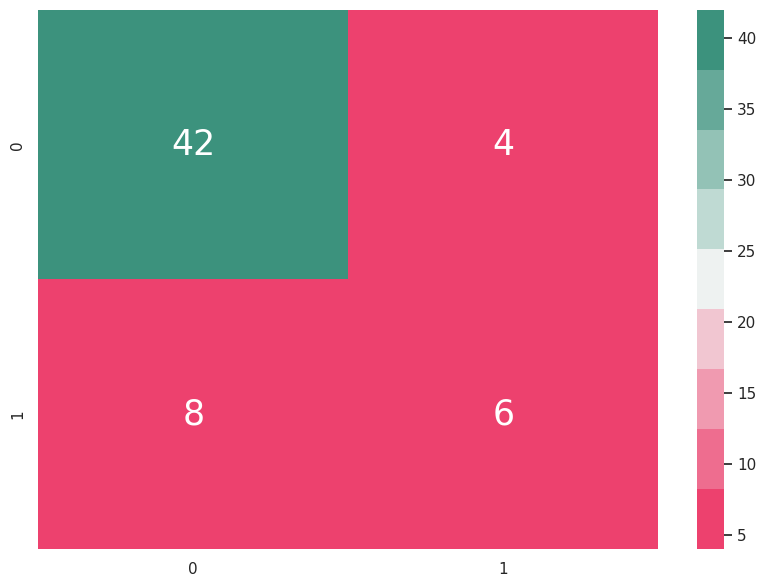

In [216]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y_test, y_pred)
ac2 = accuracy_score(y_test, y_pred)
mylist.append(ac2)
print(cm2)
print(ac2)
cmap2 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
sns.heatmap(cm2, cmap = cmap2, annot = True, annot_kws = {'size':25})

**Support Vector Classifier**

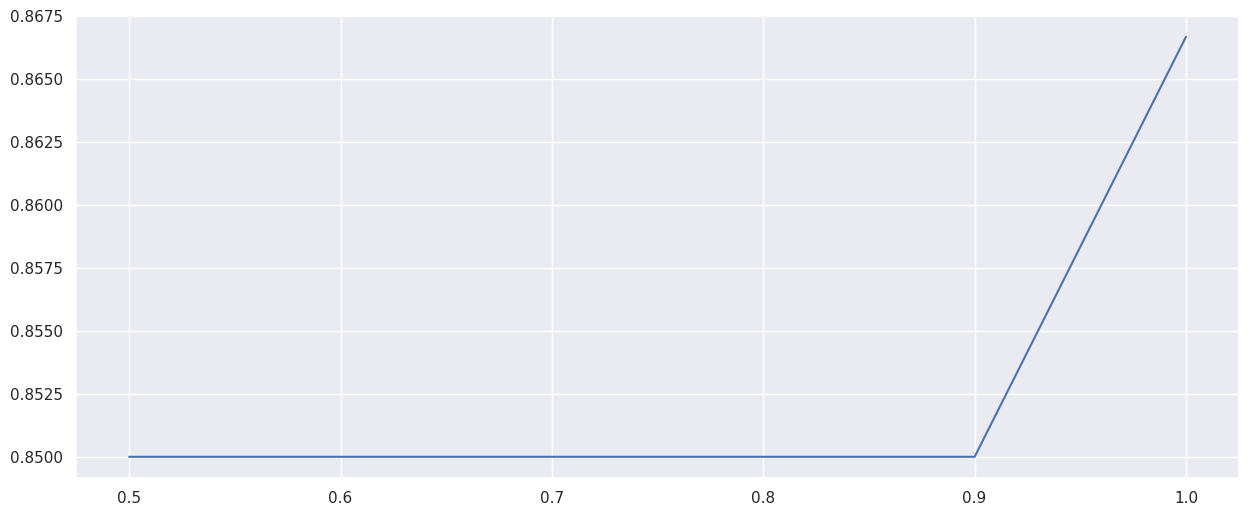

In [217]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()

In [218]:
#Training the Support Vector Classifier on the Training set
from sklearn.svm import SVC
classifier = SVC(C = 0.5, random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)


SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [219]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [220]:
# Printing classification report (since there was biasness in target labels)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        46
           1       0.86      0.43      0.57        14

    accuracy                           0.85        60
   macro avg       0.85      0.70      0.74        60
weighted avg       0.85      0.85      0.83        60



[[45  1]
 [ 8  6]]
0.85


<Axes: >

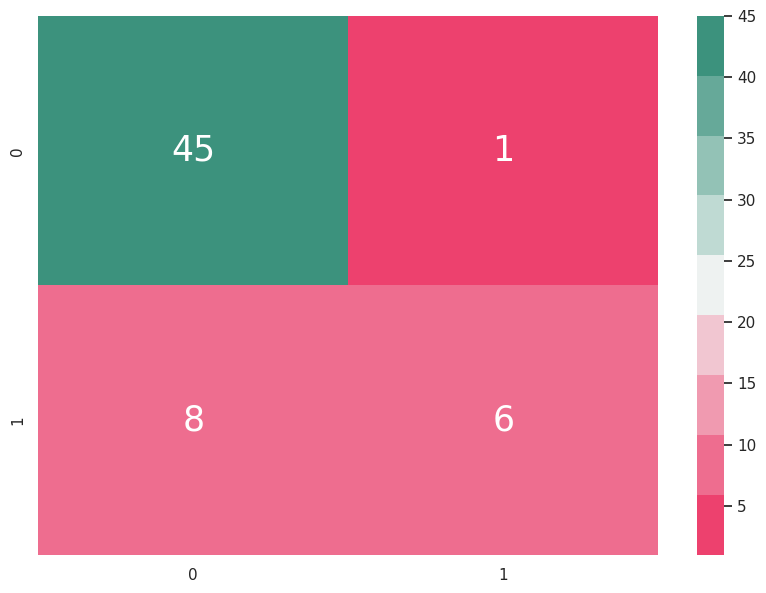

In [221]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm3 = confusion_matrix(y_test, y_pred)
ac3 = accuracy_score(y_test, y_pred)
print(cm3)
print(ac3)
mylist.append(ac3)
cmap3 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
sns.heatmap(cm3, cmap = cmap3, annot = True, annot_kws = {'size':25})
#/np.sum(cf_matrix)

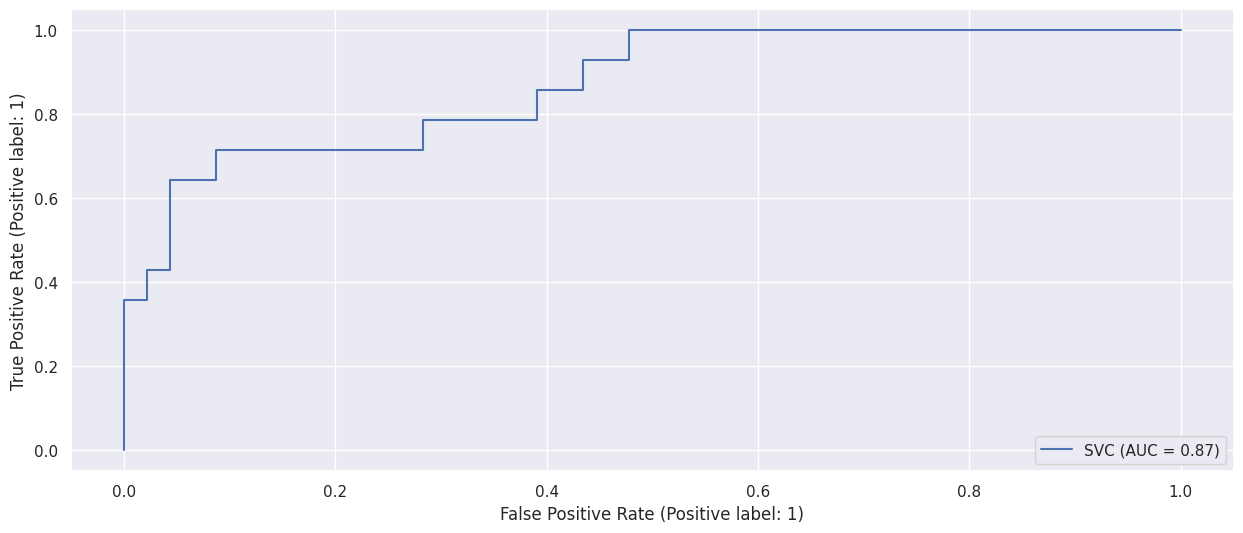

In [222]:
svc_disp = RocCurveDisplay.from_estimator(classifier, x_test, y_test)
plt.show()

**Decision Tree Classifier**

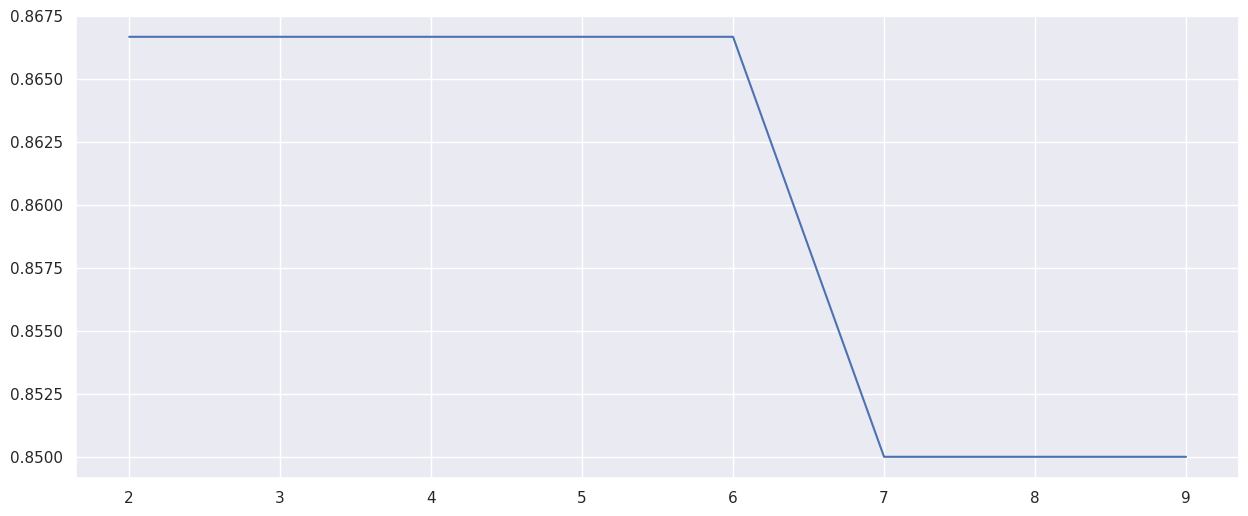

In [223]:
# Finding the optimum number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,10)), list1)
plt.show()


In [224]:
# Training the Decision Tree Classifier on the Training set

classifier = DecisionTreeClassifier(max_leaf_nodes = 6, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')

In [225]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0]


[[43  3]
 [ 5  9]]
0.8666666666666667


<Axes: >

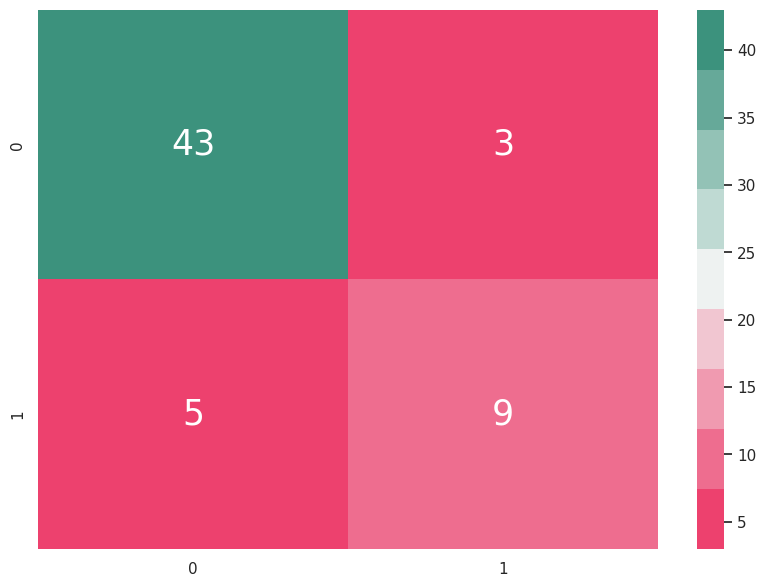

In [226]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm4 = confusion_matrix(y_test, y_pred)
ac4 = accuracy_score(y_test, y_pred)
print(cm4)
print(ac4)
mylist.append(ac4)
cmap4 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
sns.heatmap(cm4, cmap = cmap4, annot = True, annot_kws = {'size':25})

**Random Forest Classification**

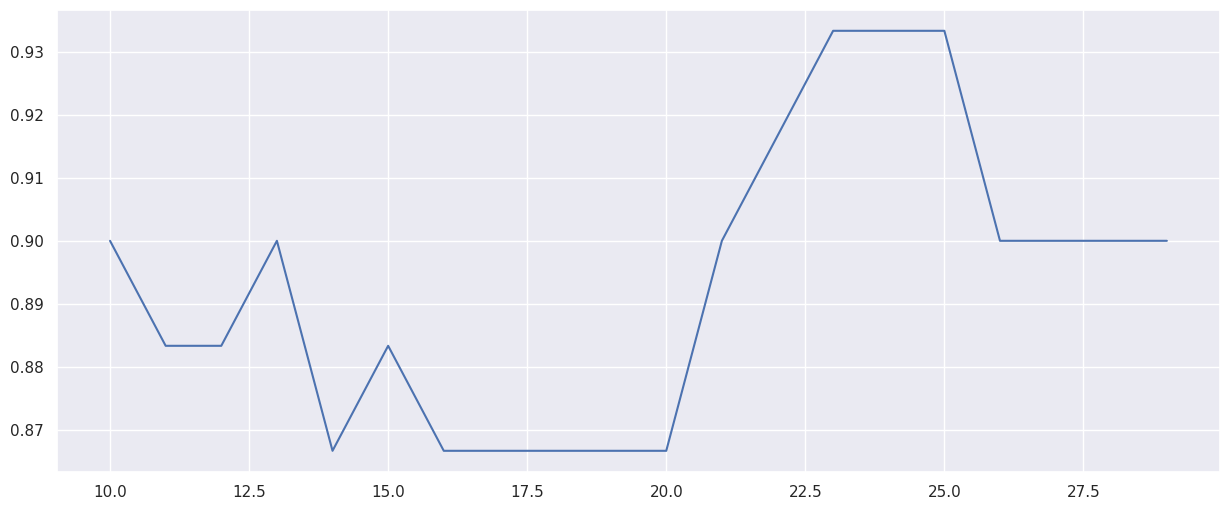

In [227]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()


In [228]:
# Training the RandomForest Classifier on the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 21, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=21, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [229]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0]


[[43  3]
 [ 3 11]]
0.9


<Axes: >

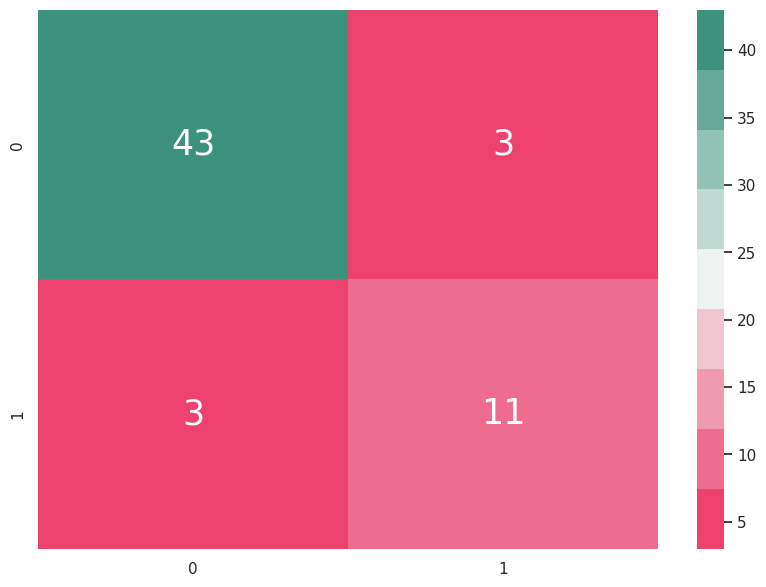

In [230]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm5 = confusion_matrix(y_test, y_pred)
ac5 = accuracy_score(y_test, y_pred)
mylist.append(ac5)
print(cm5)
print(ac5)
cmap5 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
sns.heatmap(cm5, cmap = cmap5, annot = True, annot_kws = {'size':25})

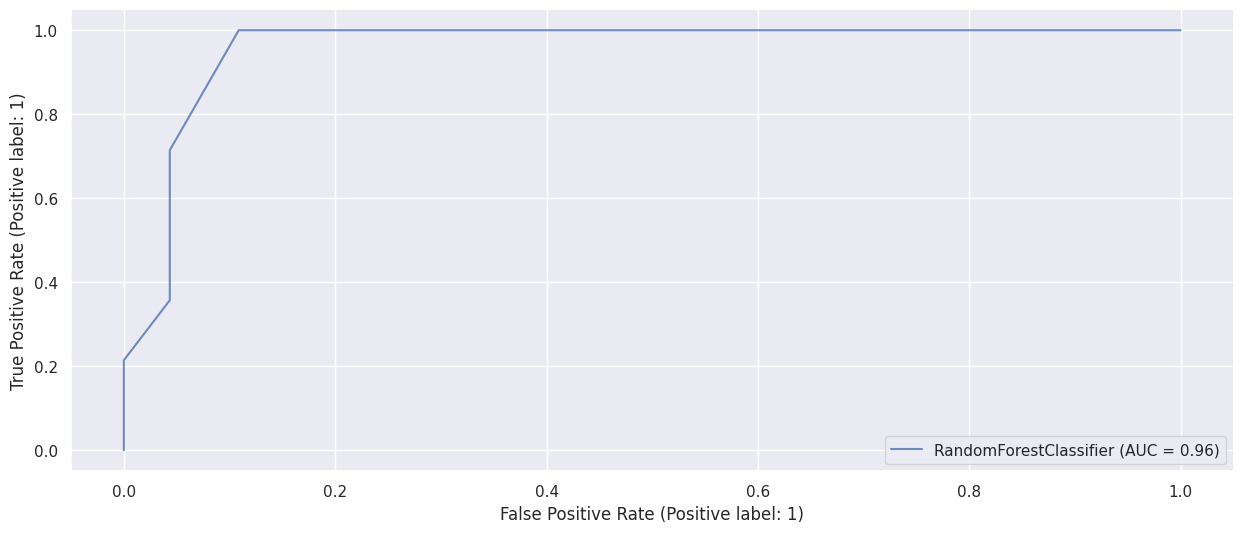

In [231]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(x_train, y_train)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, x_test, y_test, ax=ax, alpha=0.8)
plt.show()


**XG-Boost**

[0.8833333333333333, 0.8, 0.85, 0.8666666666666667, 0.9]


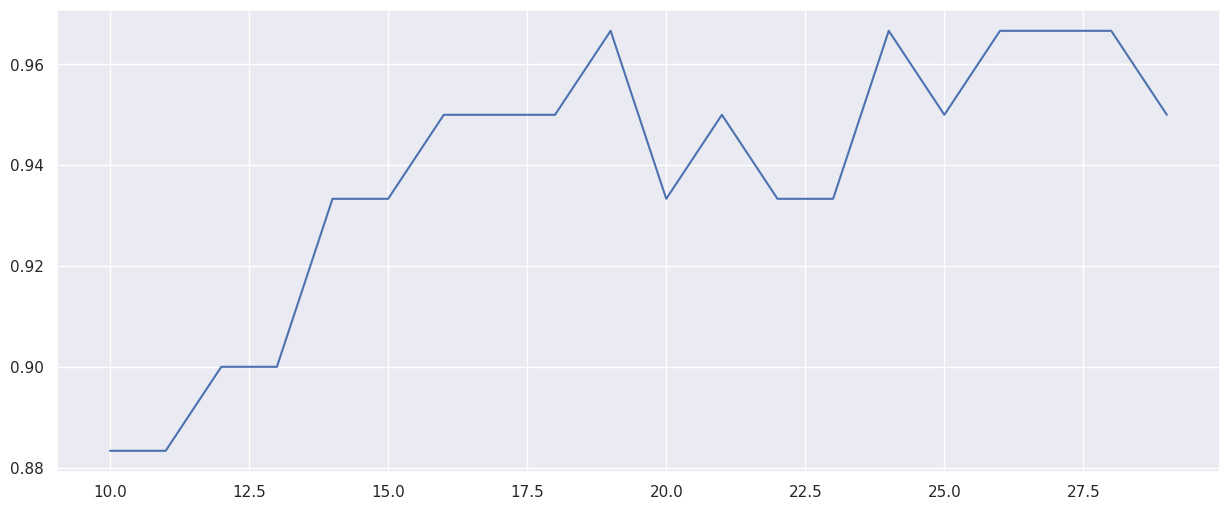

In [232]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
print(mylist)
plt.plot(list(range(10,30,1)), list1)
plt.show()

In [233]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 10, max_depth=11, subsample=0.7)
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [234]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0]


[[43  3]
 [ 4 10]]
0.8833333333333333


<Axes: >

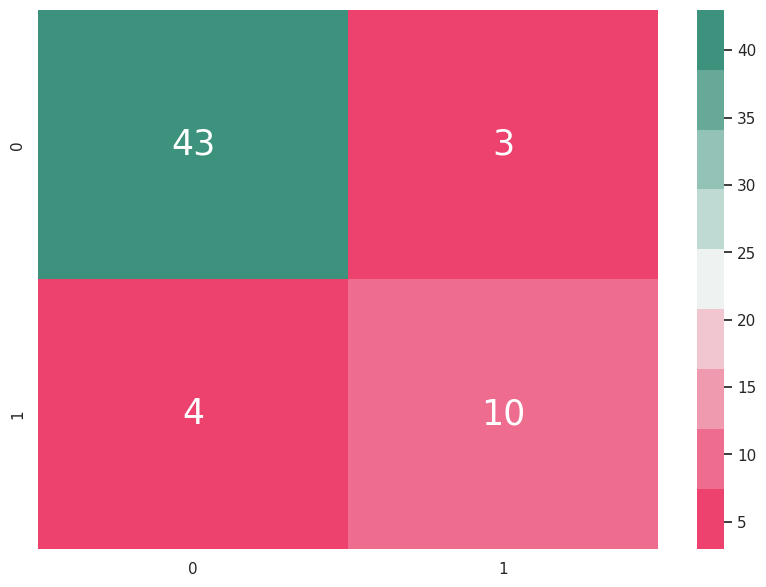

In [235]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm6 = confusion_matrix(y_test, y_pred)
ac6 = accuracy_score(y_test, y_pred)
mylist.append(ac6)
print(cm6)
print(ac6)
cmap6 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
sns.heatmap(cm6, cmap = cmap6, annot = True, annot_kws = {'size':25})

# Model's Accuracy

In [236]:
# Plotting accuracy score of different models
mylist

[0.8833333333333333, 0.8, 0.85, 0.8666666666666667, 0.9, 0.8833333333333333]

In [237]:
mylist2 = ["Logistic Regression","KNearestNeighbours","SupportVector","DecisionTree","RandomForest", "XG-Boost"]

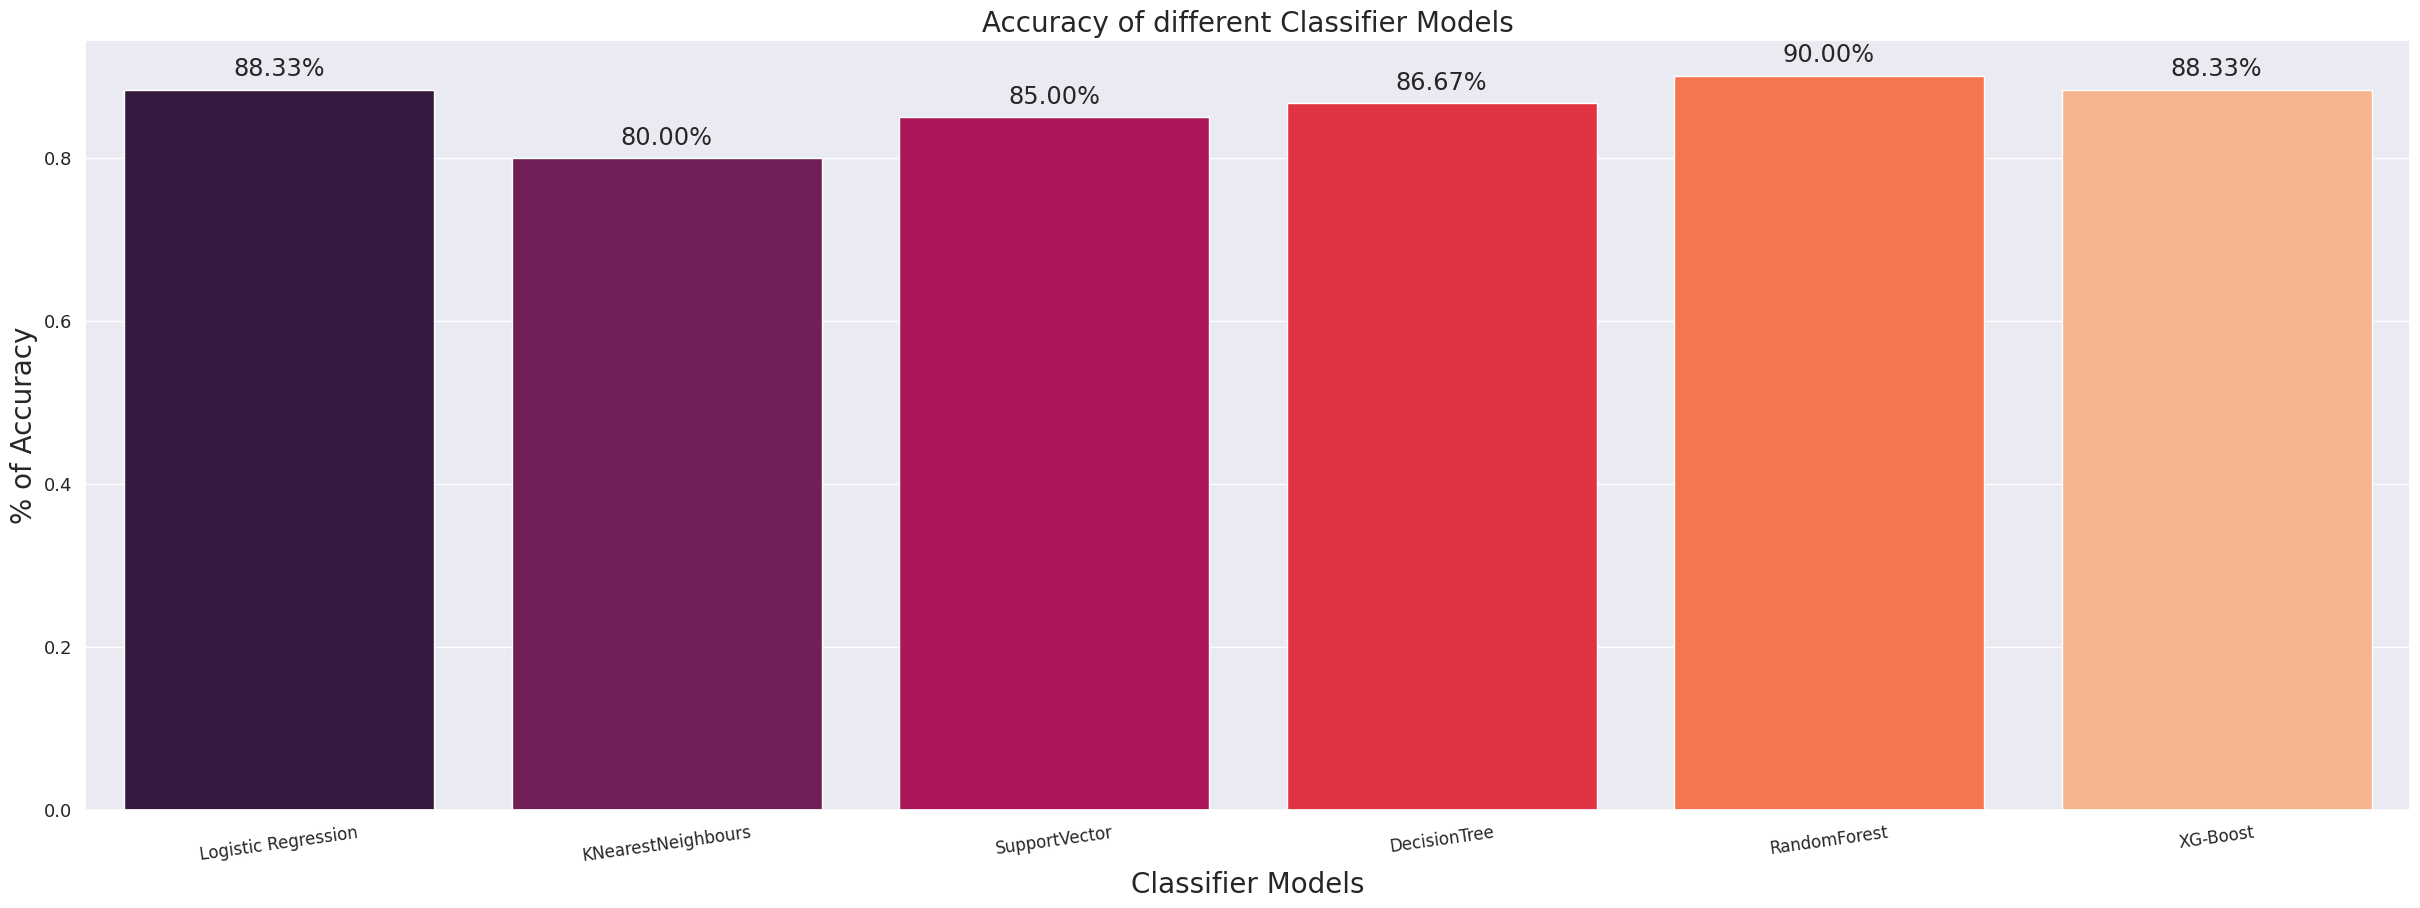

In [238]:
plt.rcParams['figure.figsize']=30,10
sns.set_style("darkgrid")
ax = sns.barplot(x = mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [239]:
# Refrences

In [240]:
#https://www.analyticsvidhya.com/blog/2022/02/heart-disease-prediction-using-machine-learning/#h2_7

In [241]:
#https://towardsdatascience.com/predicting-presence-of-heart-diseases-using-machine-learning-36f00f3edb2c#:~:text=Machine%20Learning%20can%20play%20an,and%20treatment%20per%20patient%20basis.

In [242]:
#https://www.google.com/search?q=heart+failure+prediction+using+machine+learning&ei=0VZkY_DcKLKtiLMPstc4&oq=heart+fa+prediction+using+machine+learning&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAxgAMgYIABAHEB4yBggAEAcQHjIICAAQCBAHEB4yCAgAEAgQBxAeMgUIABCGAzIFCAAQhgMyBQgAEIYDMgUIABCGAzIFCAAQhgM6CggAEEcQ1gQQsAM6BwgAEIAEEA1KBAhNGAFKBAhBGABKBAhGGABQgwZYrRVgjiVoAXABeACAAa0CiAGNCJIBBzYuMC4xLjGYAQCgAQHIAQjAAQE&sclient=gws-wiz-serp

In [243]:
#https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data